In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import random
warnings.filterwarnings("ignore")


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Explore Dataset

In [3]:
df=pd.read_csv("/content/train.csv")
#df_test=pd.read_csv("/kaggle/input/credit-score-classification/test.csv")

In [4]:
#df=pd.concat([df_train,df_test])

In [5]:
df.head(3).T

,0,1,2
ID,0x1602,0x1603,0x1604
Customer_ID,CUS_0xd40,CUS_0xd40,CUS_0xd40
Month,January,February,March
Name,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh
Age,23,23,-500
SSN,821-00-0265,821-00-0265,821-00-0265
Occupation,Scientist,Scientist,Scientist
Annual_Income,19114.12,19114.12,19114.12
Monthly_Inhand_Salary,1824.843333,NaN,NaN
Num_Bank_Accounts,3,3,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [7]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [8]:
df.shape

(100000, 28)

# Check Null Values

In [9]:
df.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,9985
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0


In [10]:
df.isnull().sum().sum()

np.int64(60071)

# Numerical Summary

In [11]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


- Need to handel the outliers problem in cols
- **Monthly _inhand_salary**:
     - its median is lower than  its mean so its right skewed_distribution
- **Num_Bank_Accounts**:
     - the range is between -1 (invalid input) to 1,798 unrealistic
     - its median is lower than its mean so it is right skewed_distribution
     - its std is large so it is wide spread distribution
- **Num_Credit_Cards**:
    - the range is between 0 to 1,499
    - the median is lower than the mean so it is right_skewed distribution
- **Interest_rate**:
    - The ranges from 1 to 5,797 which is may be outliers
    - The median is lower than the mean so it is right_skewed distribution
- **Delay_due_date**:
    - The range is between -5 (which is early payment) to 67
    - the median is close to mean so it is symmetric distribution
- **Num_Credit_inquiries**:
    - The number of credit inquiries ranges from 0 to 2,597
    -  The median is much lower than the mean which is  a right-skewed distribution
- **Credit_Utilization_Ratio**:
    - The credit utilization ratio ranges from 20% to 50%.
    - The median  is close to the mean may be  a symmetric distribution.
- **Total_EMI_per_month**:
    - The total EMI per month ranges from 0 to 82,331.
    - The median is much lower than the mean  a highly right-skewed distribution
  

# Categorical Summary

In [12]:
df.describe(include='object').T

,count,unique,top,freq
ID,100000,100000,0x25fb6,1
Customer_ID,100000,12500,CUS_0x942c,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,20867.67,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


- Noisy Data need to be cleanded

# Helper Functions

In [13]:
def non_float(col_name):
    non_float_list=[]
    for i in df[col_name]:
        try:
            float(i)   # if the i in nan it will convert to float as normal
        except: non_float_list.append(i)
    return non_float_list
# def type_loan(col_name):
#     types=[]
#     for i in df[col_name]:
#         try:
#             items=i.split(',')
#             for item in items:
#                 if 'and'in item:
#                     item=item.split('and')
#                 types.append(item.strip())
#         except:
#             pass
#     types=list(set(types))
#     return types


# Exploratory Data Analysis (EDA)

## Customer_ID

In [14]:
df["Customer_ID"].value_counts()

,count
Customer_ID,
CUS_0x942c,8
CUS_0xd40,8
CUS_0x21b1,8
CUS_0x2dbc,8
CUS_0xb891,8
...,...
CUS_0x5b48,8
CUS_0xa5f9,8
CUS_0x4d43,8


- 12500 unique values for every customer ,every customer has 8 values represent (8 months[january to augest])

## Age

In [15]:
df["Age"].value_counts()

,count
Age,
38,2833
28,2829
31,2806
26,2792
32,2749
...,...
325,1
6611,1
3779,1


In [16]:
non_float_list=non_float("Age")
print(f" Number of non float Values {len(non_float_list)}")
for i in range(10):
    random_idx=random.randint(0,len(non_float_list)-1)
    print(non_float_list[random_idx])


 Number of non float Values 4939
44_
52_
25_
17_
15_
19_
46_
31_
34_
39_


- Need to remove(_)
- Set range of age

In [17]:
df["Age"].min(),df["Age"].max()

('-500', '995')

- Need to specify a range of age
- Delete (-500) ofcourse

## Occupation

In [18]:
df["Occupation"].value_counts()

,count
Occupation,
_______,7062
Lawyer,6575
Architect,6355
Engineer,6350
Scientist,6299
Mechanic,6291
Accountant,6271
Developer,6235
Media_Manager,6232


- need to clean (_______)  to "unknown"

## Annual_Income

In [19]:
df["Annual_Income"].value_counts()

,count
Annual_Income,
20867.67,16
17273.83,16
36585.12,16
9141.63,15
33029.66,15
...,...
3874136.0,1
42588.14_,1
32291.88_,1


- Need to clean that column.Annal Income should be a float postitive number
- Need to remove(_) at the end of every value

In [20]:
non_float_list=non_float("Annual_Income")
print(f" Number of non float Values {len(non_float_list)}")
for i in range(10):
    random_idx=random.randint(0,len(non_float_list)-1)
    print(non_float_list[random_idx])

 Number of non float Values 6980
41977.78_
24667.16_
73439.26_
34204.39_
61711.89_
10455.875_
125943.63_
78937.1_
14388.79_
22870.49_


In [21]:
df["Annual_Income"].min(),df["Annual_Income"].max()

('10001727.0', '99995.22')

## Monthly_Inhand_Salary

In [22]:
df["Monthly_Inhand_Salary"].value_counts()

,count
Monthly_Inhand_Salary,
6358.956667,15
6082.187500,15
6769.130000,15
2295.058333,15
3080.555000,14
...,...
11102.135322,1
1904.390000,1
1023.217588,1


In [23]:
df["Monthly_Inhand_Salary"].max(),df["Monthly_Inhand_Salary"].min()

(15204.633333333331, 303.6454166666666)

## Num_Bank_Accounts

In [24]:
df["Num_Bank_Accounts"].value_counts()

,count
Num_Bank_Accounts,
6,13001
7,12823
8,12765
4,12186
5,12118
...,...
665,1
1388,1
1429,1


In [25]:
df["Num_Bank_Accounts"].max(),df["Num_Bank_Accounts"].min()

(1798, -1)

- -1 it it a data error and 1798 may consider it as outlier

## Num_Credit_Card

In [26]:
df["Num_Credit_Card"].value_counts()

,count
Num_Credit_Card,
5,18459
7,16615
6,16559
4,14030
3,13277
...,...
551,1
426,1
784,1


In [27]:
df["Num_Credit_Card"].max(),df["Num_Credit_Card"].min()

(1499, 0)

## Num_Of_Loan

In [28]:
df["Num_of_Loan"].value_counts()

,count
Num_of_Loan,
3,14386
2,14250
4,14016
0,10380
1,10083
...,...
613,1
1048,1
777,1


In [29]:
non_float_list=non_float("Num_of_Loan")
print(f" Number of non float Values {len(non_float_list)}")
for i in range(10):
    random_idx=random.randint(0,len(non_float_list)-1)
    print(non_float_list[random_idx])

 Number of non float Values 4785
1_
6_
4_
4_
3_
7_
1_
5_
2_
5_


- Need to clean this column also

## Type_Of_Loan

In [30]:
df["Type_of_Loan"][0]

'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'

In [31]:
df["Type_of_Loan"].value_counts()

,count
Type_of_Loan,
Not Specified,1408
Credit-Builder Loan,1280
Personal Loan,1272
Debt Consolidation Loan,1264
Student Loan,1240
...,...
"Debt Consolidation Loan, Auto Loan, Personal Loan, Debt Consolidation Loan, Student Loan, and Credit-Builder Loan",8
"Student Loan, Auto Loan, Student Loan, Credit-Builder Loan, Home Equity Loan, Debt Consolidation Loan, and Debt Consolidation Loan",8
"Debt Consolidation Loan, Personal Loan, Mortgage Loan, Personal Loan, Not Specified, Mortgage Loan, and Home Equity Loan",8


In [32]:
df["Type_of_Loan"].unique(),len(df["Type_of_Loan"].unique())

(array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
        'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
        ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
        'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
        'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
       dtype=object),
 6261)

In [33]:
# types=type_loan("Type_of_Loan")
# print(f"Number of different type of loan {len(types)}")
# for i in types:
#     print(i)

## Delay_From_due_date

In [34]:
df["Delay_from_due_date"].unique()

array([ 3, -1,  5,  6,  8,  7, 13, 10,  0,  4,  9,  1, 12, 11, 30, 31, 34,
       27, 14,  2, -2, 16, 17, 15, 23, 22, 21, 18, 19, 52, 51, 48, 53, 26,
       43, 28, 25, 20, 47, 46, 49, 24, 61, 29, 50, 58, 45, 59, 55, 56, 57,
       54, 62, 65, 64, 67, 36, 41, 33, 32, 39, 44, 42, 60, 35, 38, -3, 63,
       40, 37, -5, -4, 66])

- There are some -ve number which is wrong because days can't be negative

## Num_of_Delayed_Payment

In [35]:
df["Num_of_Delayed_Payment"].unique()

array(['7', nan, '4', '8_', '6', '1', '-1', '3_', '0', '8', '5', '3', '9',
       '12', '15', '17', '10', '2', '2_', '11', '14', '20', '22', '13',
       '13_', '14_', '16', '12_', '18', '19', '23', '24', '21', '3318',
       '3083', '22_', '1338', '4_', '26', '11_', '3104', '21_', '25',
       '10_', '183_', '9_', '1106', '834', '19_', '24_', '17_', '23_',
       '2672', '20_', '2008', '-3', '538', '6_', '1_', '16_', '27', '-2',
       '3478', '2420', '15_', '707', '708', '26_', '18_', '3815', '28',
       '5_', '1867', '2250', '1463', '25_', '7_', '4126', '2882', '1941',
       '2655', '2628', '132', '3069', '306', '0_', '3539', '3684', '1823',
       '4128', '1946', '827', '2297', '2566', '904', '182', '929', '3568',
       '2503', '1552', '2812', '1697', '3764', '851', '3905', '923', '88',
       '1668', '3253', '808', '2689', '3858', '642', '3457', '1402',
       '1732', '3154', '847', '3037', '2204', '3103', '1063', '2056',
       '1282', '1841', '2569_', '211', '793', '3484', '4

In [36]:
non_float_list=non_float("Num_of_Delayed_Payment")
print(f" Number of non float Values {len(non_float_list)}")
for i in range(10):
    random_idx=random.randint(0,len(non_float_list)-1)
    print(non_float_list[random_idx])

 Number of non float Values 2744
15_
12_
21_
17_
11_
23_
8_
0_
13_
19_


- Need to clean (_) at the end of the values

## Changed_Credit_Limit

In [37]:
df["Changed_Credit_Limit"].unique()

array(['11.27', '_', '6.27', ..., '17.509999999999998', '25.16', '21.17'],
      dtype=object)

In [38]:
non_float_list=non_float("Changed_Credit_Limit")
print(f" Number of non float Values {len(non_float_list)}")
for i in range(10):
    random_idx=random.randint(0,len(non_float_list)-1)
    print(non_float_list[random_idx])

 Number of non float Values 2091
_
_
_
_
_
_
_
_
_
_


## Nume_Credit_Inquiries

In [39]:
df["Num_Credit_Inquiries"].unique()

array([   4.,    2.,    3., ..., 1361.,  310.,   74.])

## Credit_Mix

In [40]:
df["Credit_Mix"].value_counts()

,count
Credit_Mix,
Standard,36479
Good,24337
_,20195
Bad,18989


- Need to handel (_) may be by encoding

## Outstanding_Debt

In [41]:
df["Outstanding_Debt"].value_counts()

,count
Outstanding_Debt,
1360.45,24
1151.7,23
1109.03,23
460.46,23
796.88,16
...,...
911.67_,1
1344.25_,1
465.88_,1


In [42]:
non_float_list=non_float("Outstanding_Debt")
print(f" Number of non float Values {len(non_float_list)}")
for i in range(10):
    random_idx=random.randint(0,len(non_float_list)-1)
    print(non_float_list[random_idx])

 Number of non float Values 1009
364.08_
708.27_
2150.61_
864.67_
1150.54_
2517.0_
544.82_
1182.19_
327.43_
270.42_


## Credit_History_Age

In [43]:
df["Credit_History_Age"].unique()

array(['22 Years and 1 Months', nan, '22 Years and 3 Months',
       '22 Years and 4 Months', '22 Years and 5 Months',
       '22 Years and 6 Months', '22 Years and 7 Months',
       '26 Years and 7 Months', '26 Years and 8 Months',
       '26 Years and 9 Months', '26 Years and 10 Months',
       '26 Years and 11 Months', '27 Years and 0 Months',
       '27 Years and 1 Months', '27 Years and 2 Months',
       '17 Years and 9 Months', '17 Years and 10 Months',
       '17 Years and 11 Months', '18 Years and 1 Months',
       '18 Years and 2 Months', '18 Years and 3 Months',
       '18 Years and 4 Months', '17 Years and 3 Months',
       '17 Years and 4 Months', '17 Years and 5 Months',
       '17 Years and 6 Months', '17 Years and 7 Months',
       '17 Years and 8 Months', '30 Years and 8 Months',
       '30 Years and 9 Months', '30 Years and 10 Months',
       '30 Years and 11 Months', '31 Years and 0 Months',
       '31 Years and 1 Months', '31 Years and 2 Months',
       '31 Years and

## Payment_of_Min_Amount

In [44]:
df["Payment_of_Min_Amount"].value_counts()

,count
Payment_of_Min_Amount,
Yes,52326
No,35667
NM,12007


## Amount_invested_monthly

In [45]:
df["Amount_invested_monthly"].value_counts()

,count
Amount_invested_monthly,
__10000__,4305
0.0,169
59.93725850034815,1
165.180659491917,1
62.030802602004044,1
...,...
109.296681189146,1
33.6098814431885,1
76.87001005130772,1


In [46]:
non_float_list=non_float("Amount_invested_monthly")
print(f" Number of non float Values {len(non_float_list)}")
for i in range(10):
    random_idx=random.randint(0,len(non_float_list)-1)
    print(non_float_list[random_idx])

 Number of non float Values 4305
__10000__
__10000__
__10000__
__10000__
__10000__
__10000__
__10000__
__10000__
__10000__
__10000__


## Payment_Behaviour

In [47]:
df["Payment_Behaviour"].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

- 6unique values can be mapping
- there is a wrong value need to remove

## Monthly_Balance

In [48]:
df["Monthly_Balance"].value_counts()

,count
Monthly_Balance,
__-333333333333333333333333333__,9
252.08489793906085,1
254.9709216273975,1
250.0931678204641,1
289.7550752754317,1
...,...
278.8720257394474,1
376.7024623690405,1
321.2336043357731,1


In [49]:
non_float_list=non_float("Monthly_Balance")
print(f" Number of non float Values {len(non_float_list)}")
for i in range(10):
    random_idx=random.randint(0,len(non_float_list)-1)
    print(non_float_list[random_idx])

 Number of non float Values 9
__-333333333333333333333333333__
__-333333333333333333333333333__
__-333333333333333333333333333__
__-333333333333333333333333333__
__-333333333333333333333333333__
__-333333333333333333333333333__
__-333333333333333333333333333__
__-333333333333333333333333333__
__-333333333333333333333333333__
__-333333333333333333333333333__


- This value is wrong need to be handel may add 0 instead of it

## Credit_SCore

In [50]:
df["Credit_Score"].value_counts()

,count
Credit_Score,
Standard,53174
Poor,28998
Good,17828


# Data Cleaning

In [51]:
def remove_under_score(df,col_name,to_float=True):
   df[col_name]=df[col_name].astype(str).replace("_","",regex=False)
   if to_float:
        df[col_name]=pd.to_numeric(df[col_name],errors='coerce')
   return df


In [52]:
df.dtypes

,0
ID,object
Customer_ID,object
Month,object
Name,object
Age,object
SSN,object
Occupation,object
Annual_Income,object
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64


In [53]:
drop_cols=["ID","Customer_ID","Month","Name","SSN","Type_of_Loan"]
df.drop(drop_cols,axis=1,inplace=True)

In [54]:
col_remove_us=["Age","Annual_Income","Num_of_Loan","Num_of_Delayed_Payment",
              "Changed_Credit_Limit","Outstanding_Debt","Amount_invested_monthly","Monthly_Balance"]
for col in col_remove_us:
    df=remove_under_score(df,col,to_float=True) # any empty vlaues will convert to nan

In [55]:
df.dtypes

,0
Age,float64
Occupation,object
Annual_Income,float64
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64
Num_Credit_Card,int64
Interest_Rate,int64
Num_of_Loan,float64
Delay_from_due_date,int64
Num_of_Delayed_Payment,float64


In [56]:
df["Occupation"]=df["Occupation"].replace("_______",np.nan)
#df["Changed_Credit_Limit"]=df["Changed_Credit_Limit"].replace("_",np.nan).astype(float)
df["Credit_Mix"]=df["Credit_Mix"].replace("_","Standard")
df["Payment_of_Min_Amount"]=df["Payment_of_Min_Amount"].replace("NM",np.nan)
#df["Amount_invested_monthly"] = df["Amount_invested_monthly"].replace("__10000__", np.nan).astype(float)
df["Payment_Behaviour"]=df["Payment_Behaviour"].replace("!@9#%8",np.nan)
#df["Monthly_Balance"] = df["Monthly_Balance"].replace("__-333333333333333333333333333__", np.nan).astype(float)


In [57]:
df.isnull().sum().sum(),df.shape

(np.int64(92209), (100000, 22))

<Axes: >

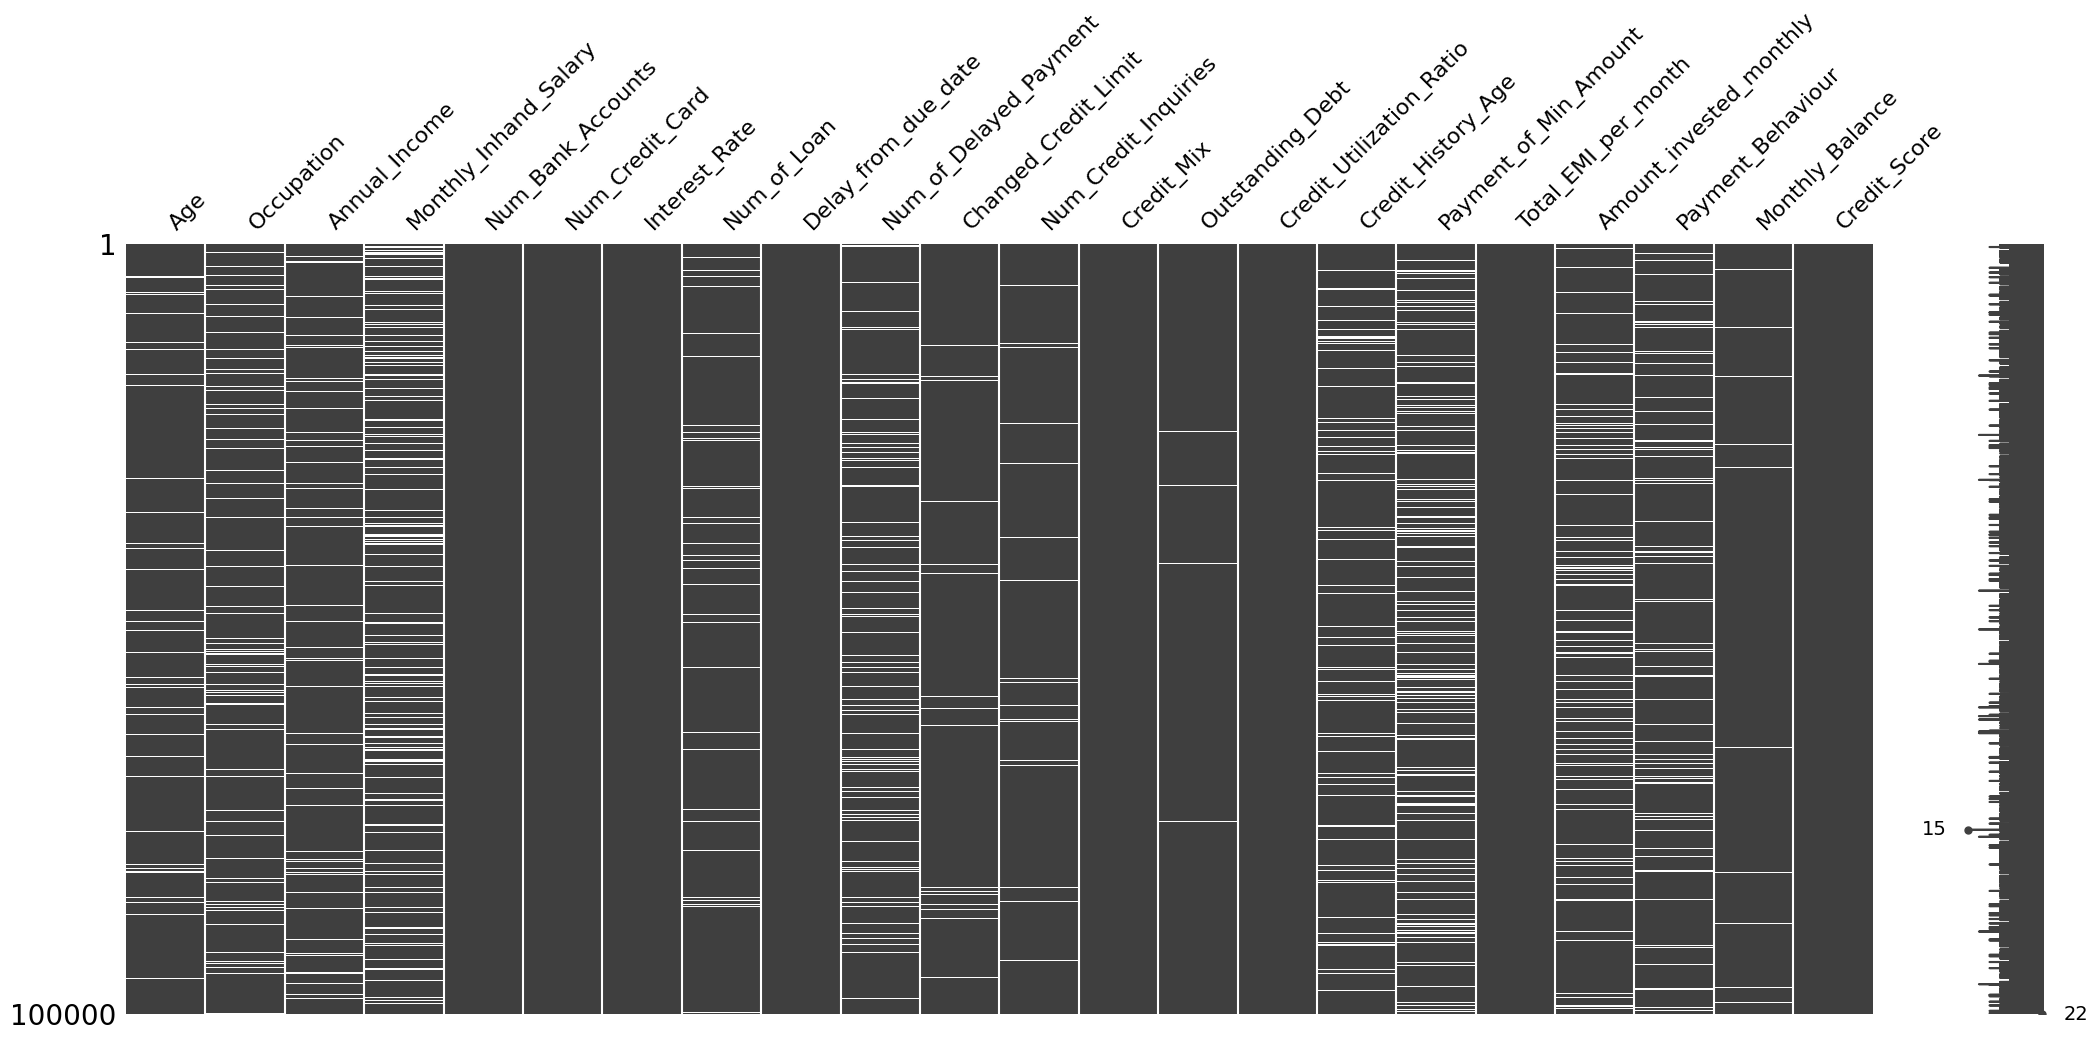

In [58]:
import missingno as msno
msno.matrix(df)

In [59]:
# percentage of null values
df.isnull().sum().sum()/df.size*100

np.float64(4.191318181818183)

In [60]:
df.dtypes

,0
Age,float64
Occupation,object
Annual_Income,float64
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64
Num_Credit_Card,int64
Interest_Rate,int64
Num_of_Loan,float64
Delay_from_due_date,int64
Num_of_Delayed_Payment,float64


In [61]:
# visualize first for cats ,numerical
#here should set range for age,outliers in numerical features

# Visualization

## Categorical_Visualization

In [62]:
cats=df.select_dtypes(["category","object"]).columns
cats

Index(['Occupation', 'Credit_Mix', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

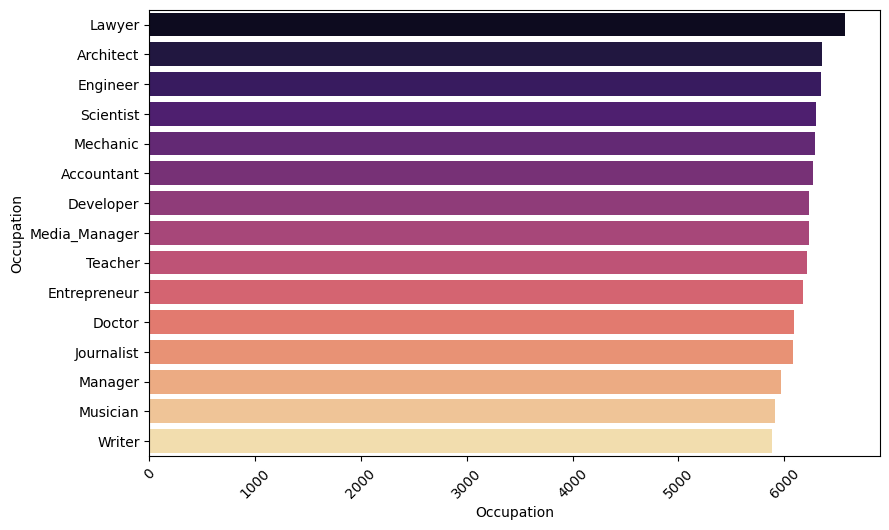

In [63]:
plt.figure(figsize=(9,5))
occupation_count=df["Occupation"].value_counts()
sns.barplot(x=occupation_count.values,y=occupation_count.index,palette="magma")
plt.tight_layout()
plt.xticks(rotation=45)
plt.xlabel("Occupation")
plt.show()


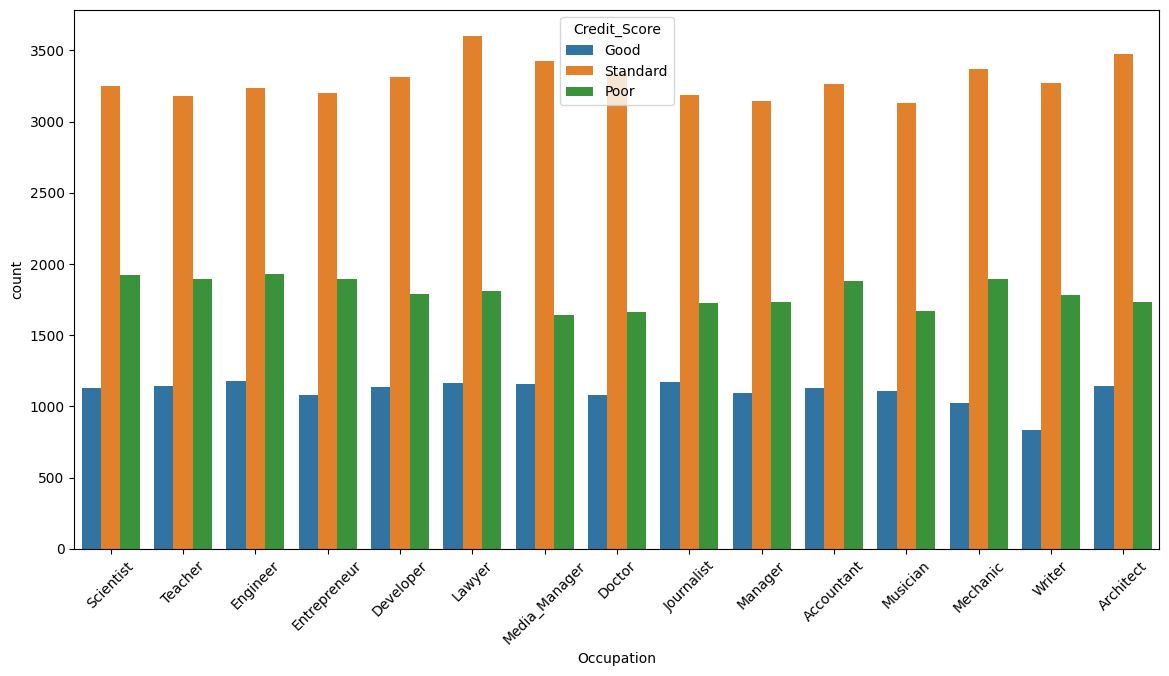

In [64]:
plt.figure(figsize=(14,7))
sns.countplot(data=df,x="Occupation",hue="Credit_Score")
plt.xticks(rotation=45)
plt.show()

- every occupation has almost  the same distribution of creditscore

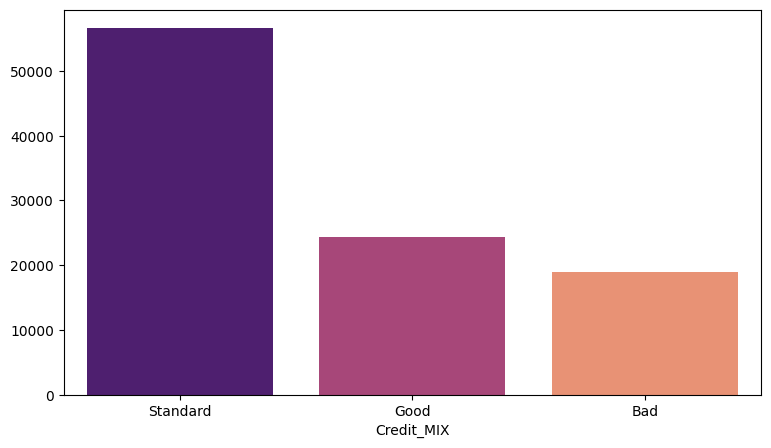

In [65]:
c=df["Credit_Mix"].value_counts(dropna=False)
plt.figure(figsize=(9,5))
sns.barplot(x=c.index,y=c.values,palette="magma")
plt.xlabel("Credit_MIX")
plt.show()

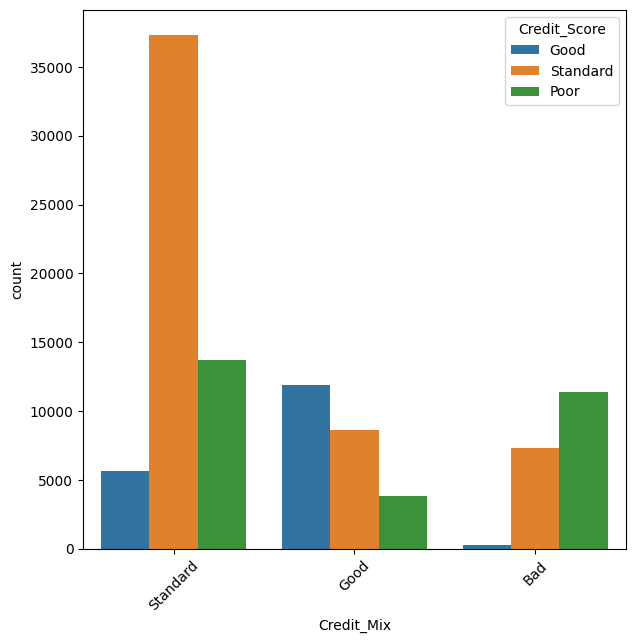

In [66]:
plt.figure(figsize=(7,7))
sns.countplot(data=df,x="Credit_Mix",hue="Credit_Score")
plt.xticks(rotation=45)
plt.show()

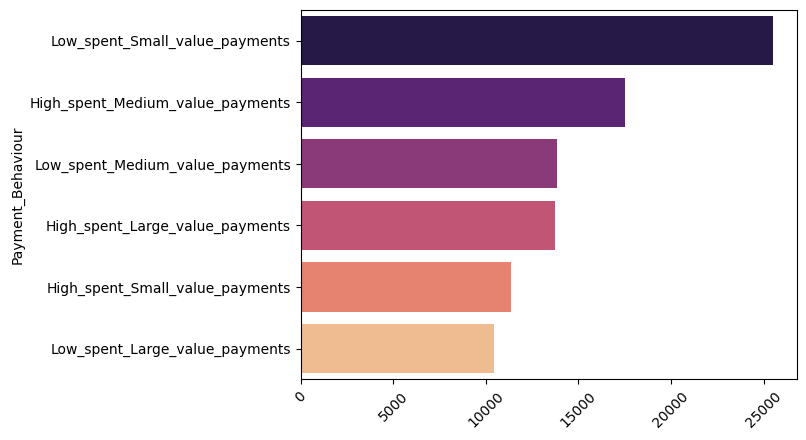

In [67]:
c=df["Payment_Behaviour"].value_counts(dropna=False).sort_values(ascending=False)
sns.barplot(x=c.values,y=c.index,palette="magma")
plt.xticks(rotation=45)
plt.show()


Payment_of_Min_Amount
Yes    52326
No     35667
NaN    12007
Name: count, dtype: int64


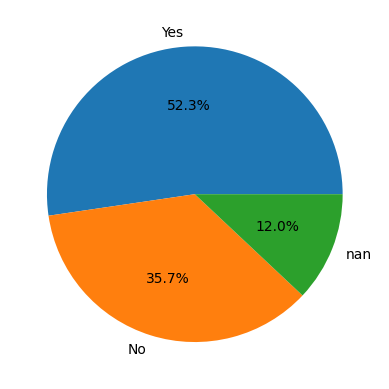

In [68]:
c=df["Payment_of_Min_Amount"].value_counts(dropna=False)
print(c)
plt.pie(c.values,labels=c.index,autopct="%1.1f%%")
plt.show()

(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],

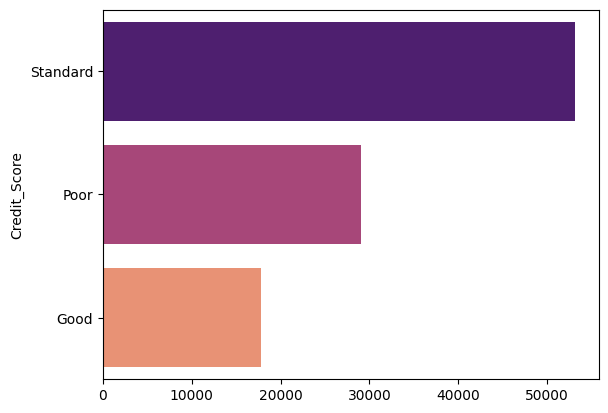

In [69]:
c=df["Credit_Score"].value_counts().sort_values(ascending=False)
sns.barplot(x=c.values,y=c.index,palette="magma")
plt.show()

- Class imbalance
- Need to use sampling Techniques

## Numerical Viasualization

In [70]:
nums=df.select_dtypes(["int","float"]).columns
nums,len(nums)

(Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
        'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
        'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
        'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
        'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
       dtype='object'),
 16)

In [71]:
df["Age"].isnull().sum(),df["Age"].max(),df["Age"].min()

(np.int64(4939), 8698.0, -500.0)

- Need to specifiy range for age

In [72]:
df.shape

(100000, 22)

In [73]:
df["Age"]=df["Age"].apply(lambda x: x if 20<=x<=70 else np.nan)


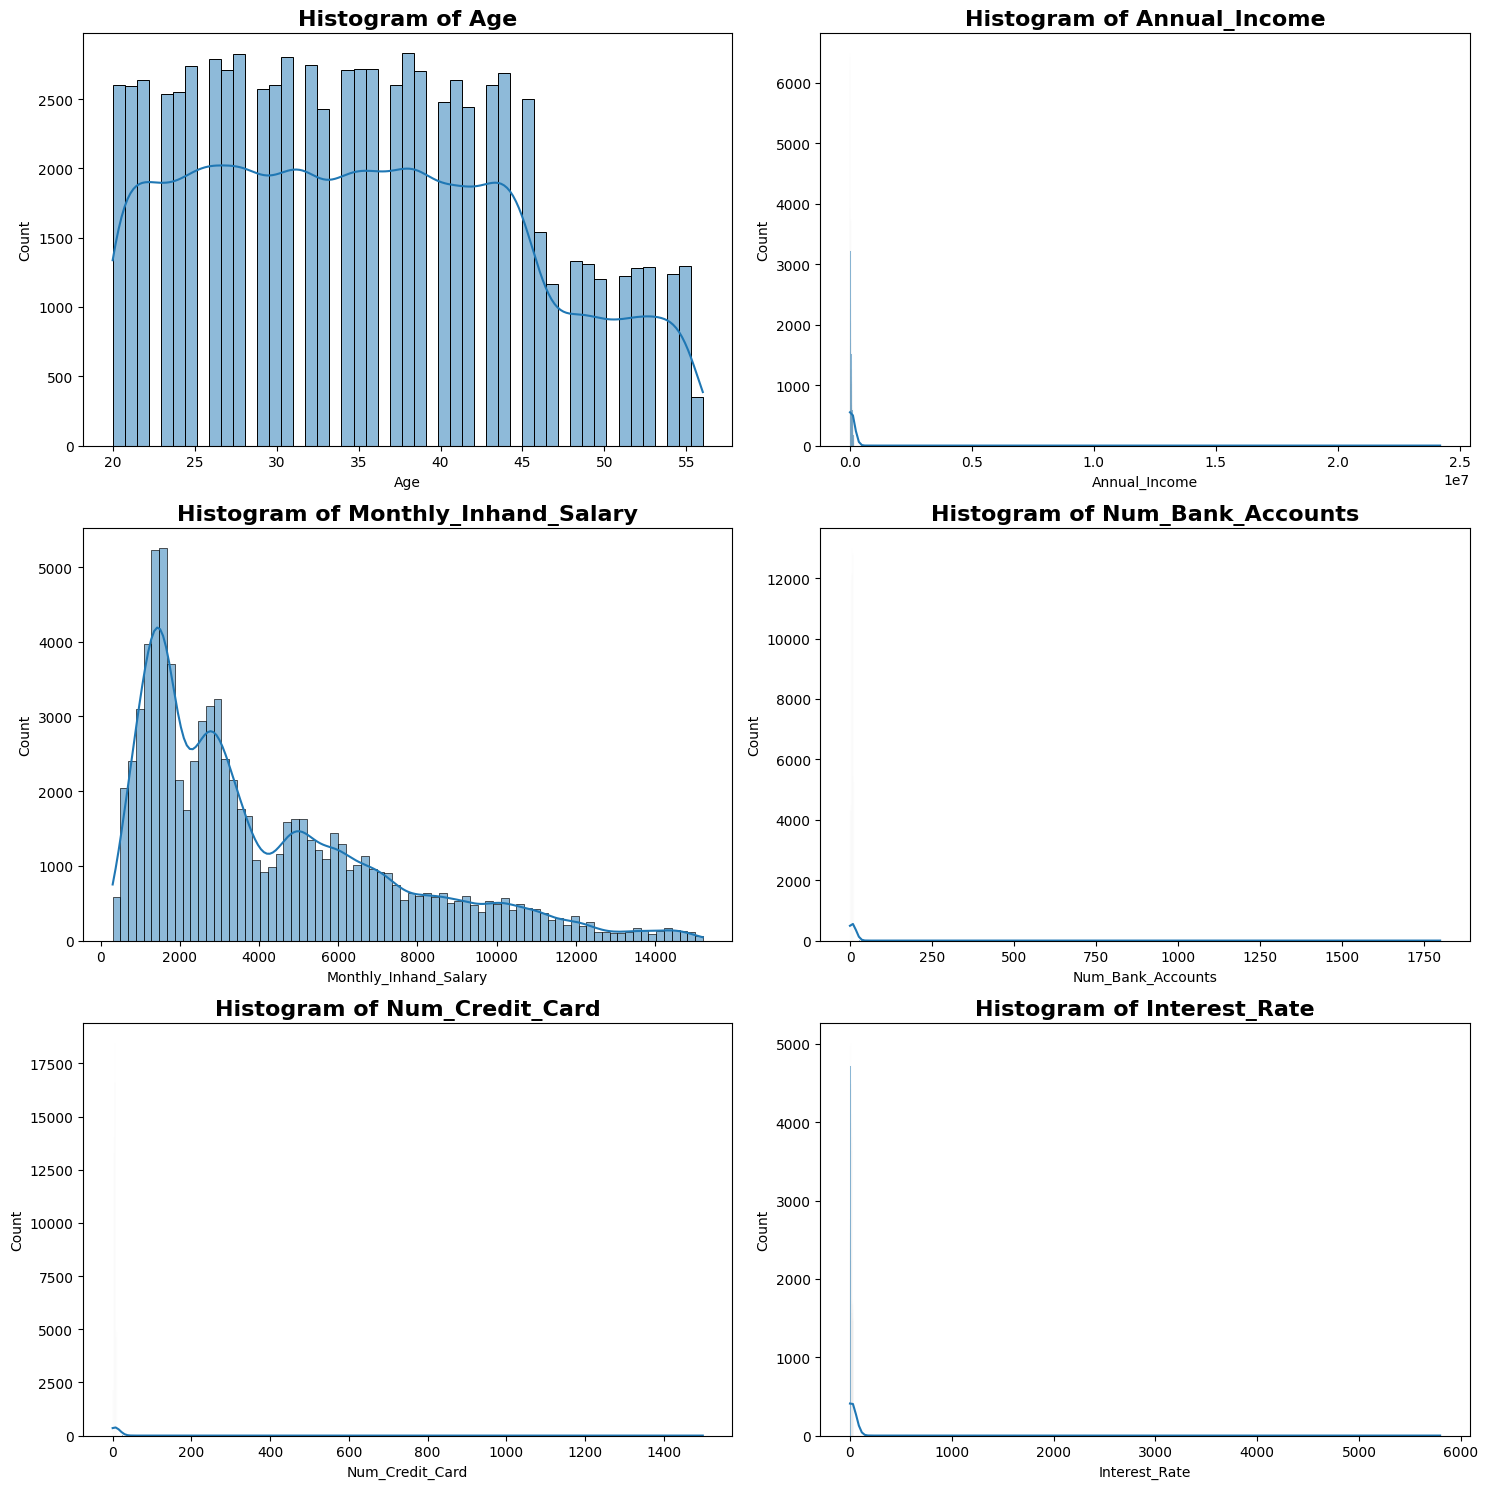

In [74]:
plt.figure(figsize=(15,15))
for i,num in enumerate(nums[0:6]):
    plt.subplot(3,2,i+1)
    sns.histplot(df[num], kde=True,palette="magma")
    plt.title(f"Histogram of {num}",fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

- Most of features here are right skewed
- Need to handel outliers [IQR,Zscore]

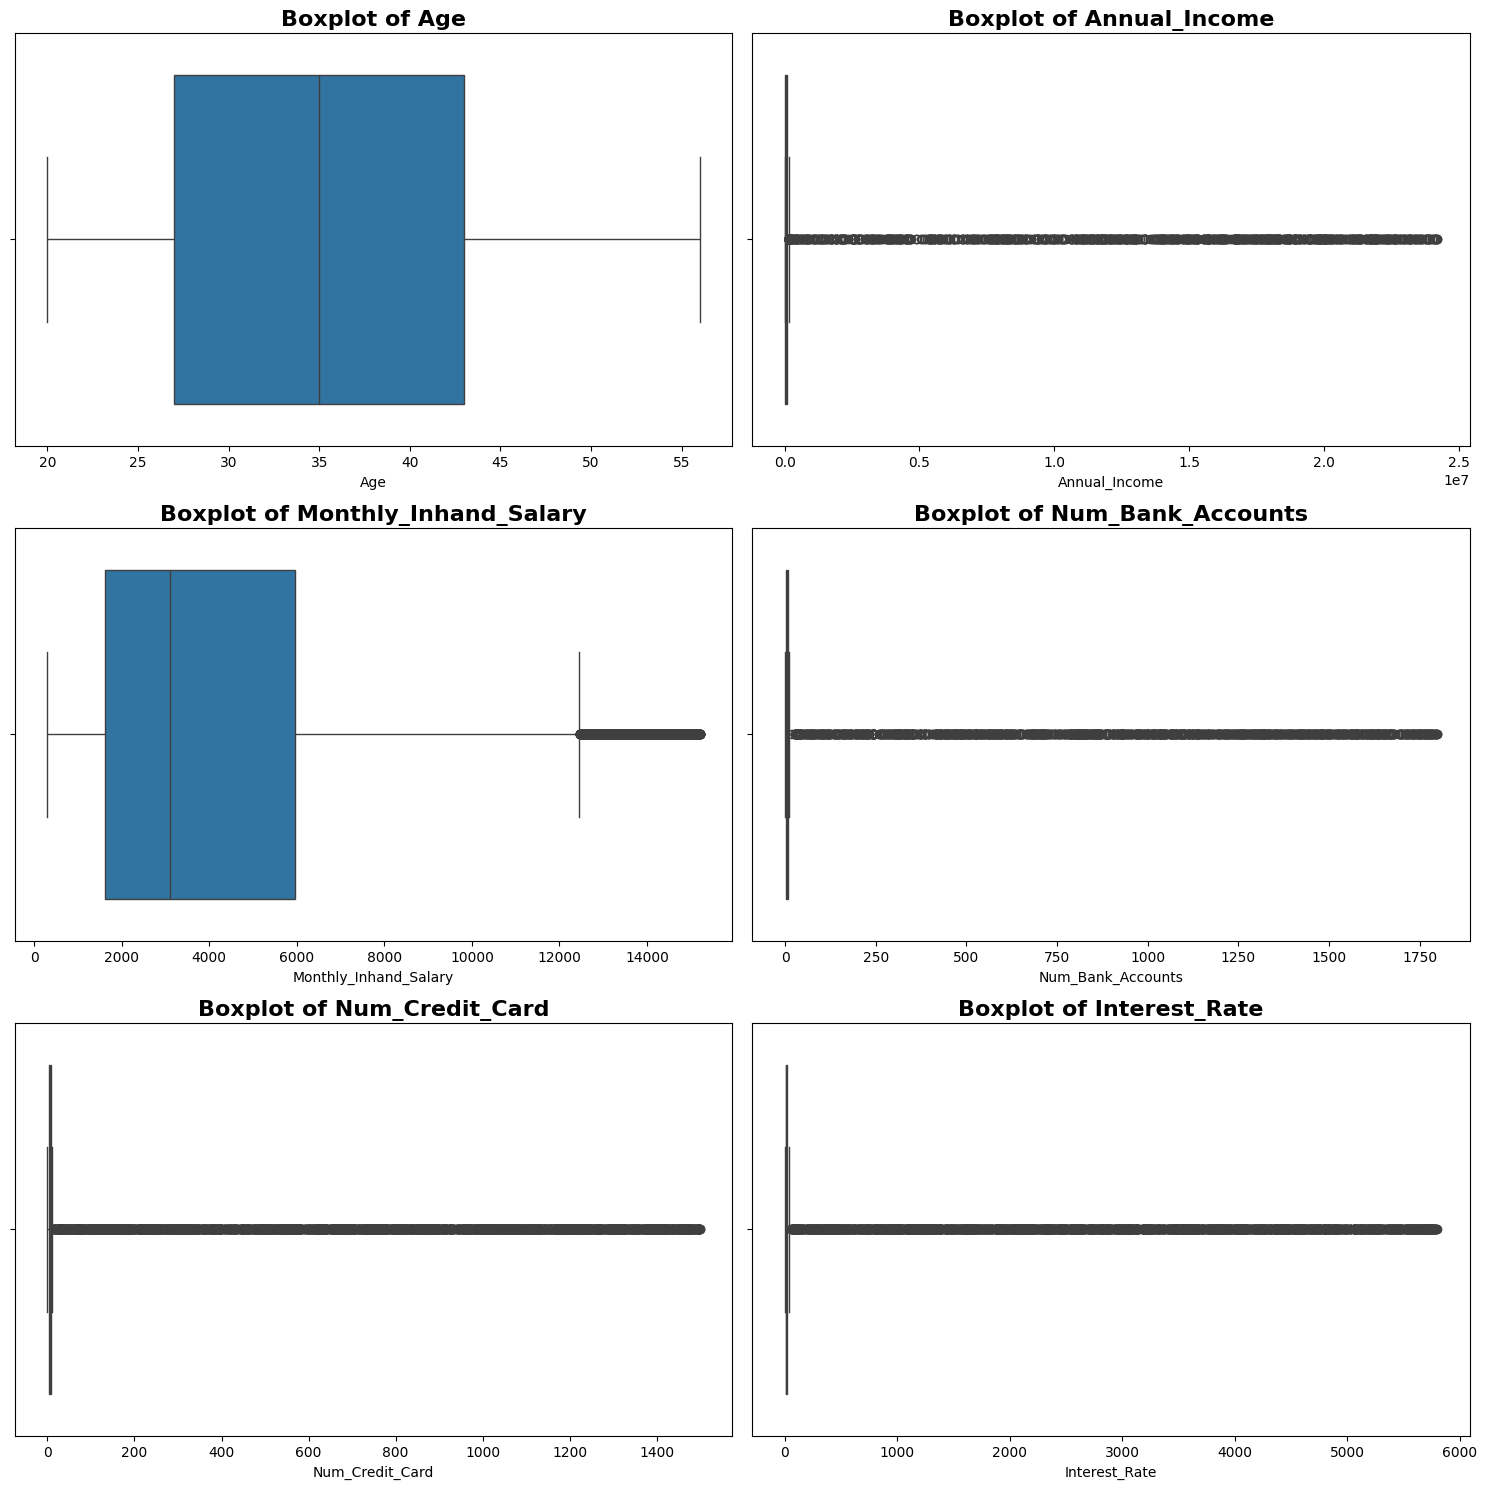

In [75]:
plt.figure(figsize=(15,15))
for i,num in enumerate(nums[0:6]):
    plt.subplot(3,2,i+1)
    sns.boxplot(data=df,x=num)
    plt.title(f"Boxplot of {num}",fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()


- Alot of Outlires need to handel

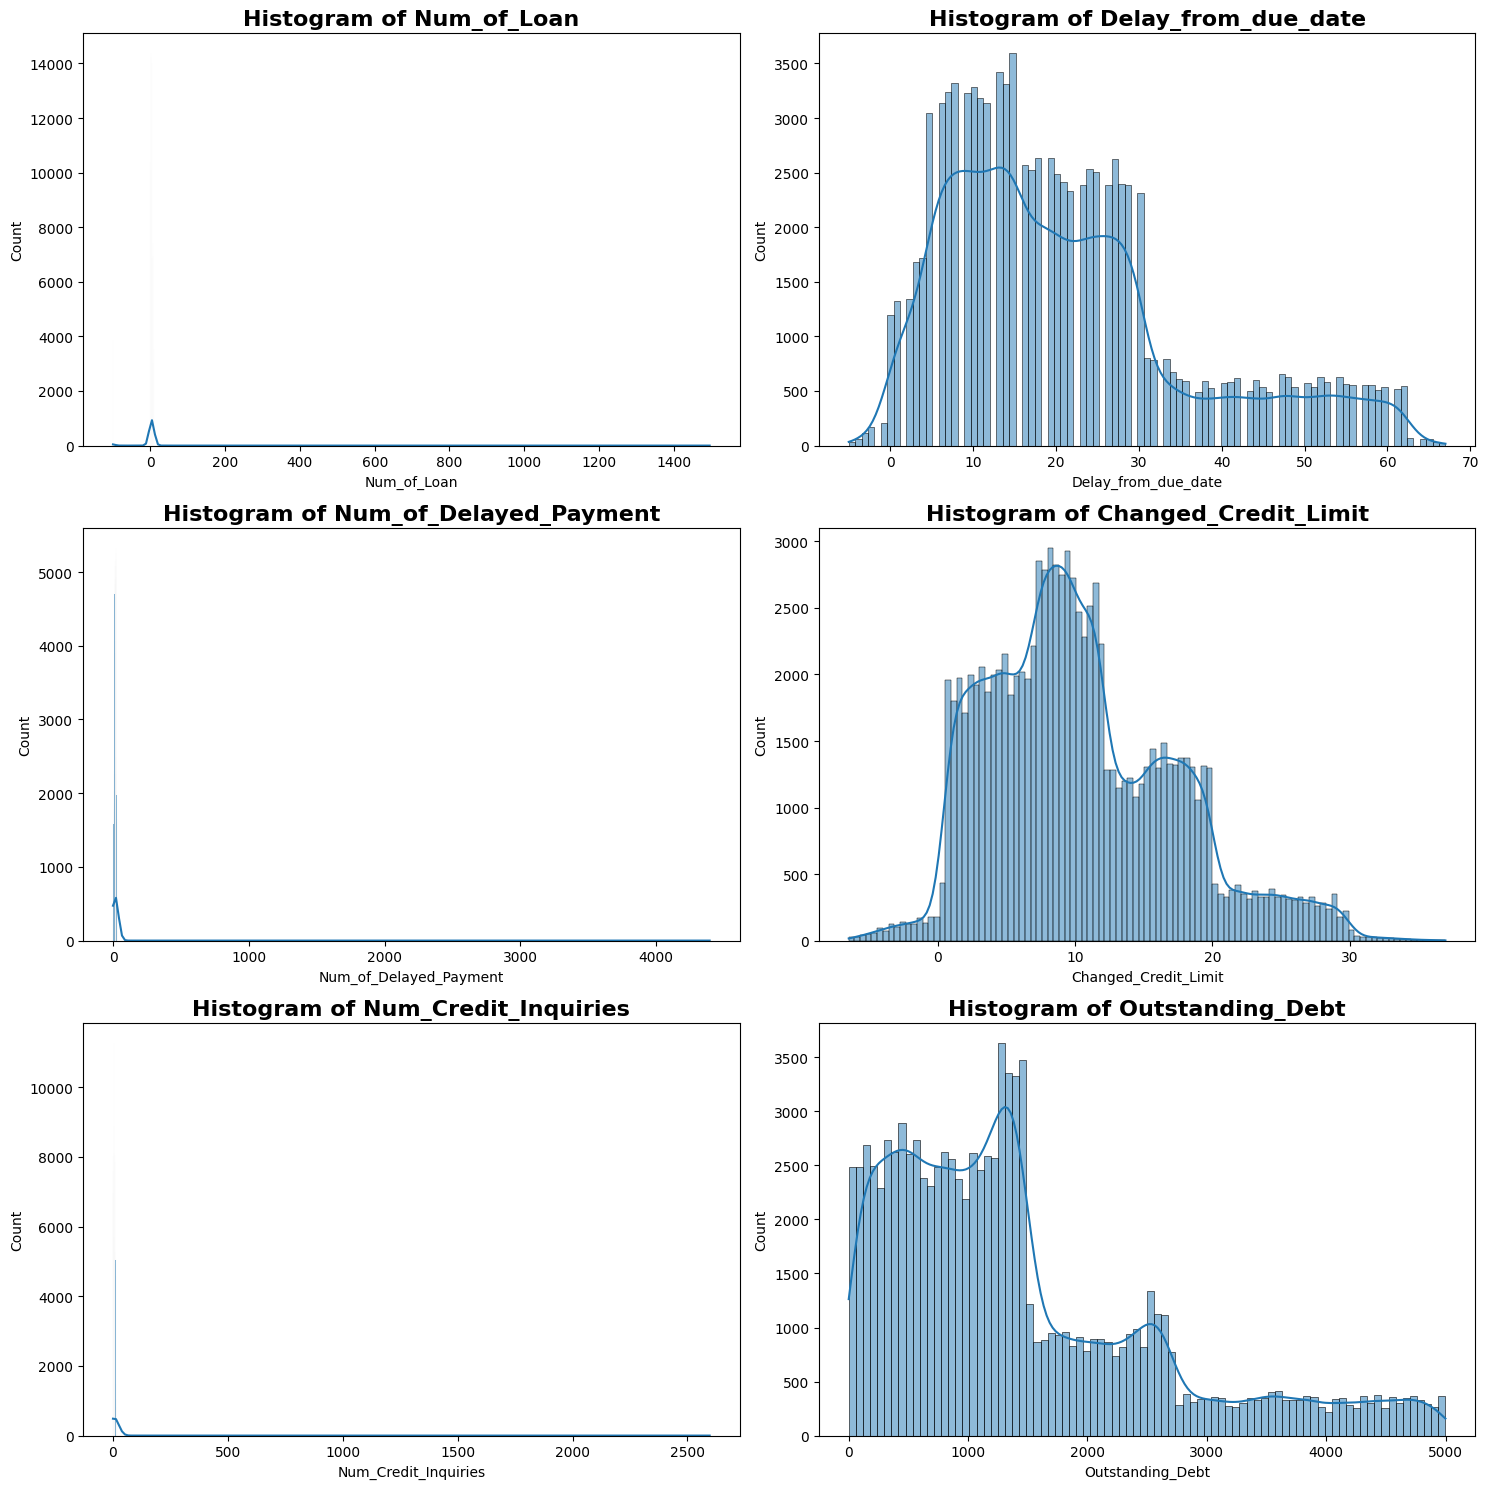

In [76]:
plt.figure(figsize=(15,15))
for i,num in enumerate(nums[6:12]):
    plt.subplot(3,2,i+1)
    sns.histplot(df[num], kde=True,palette="magma")
    plt.title(f"Histogram of {num}",fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

In [77]:
df["Num_of_Loan"]=df["Num_of_Loan"].apply(lambda x:x if x>=0 else np.nan)

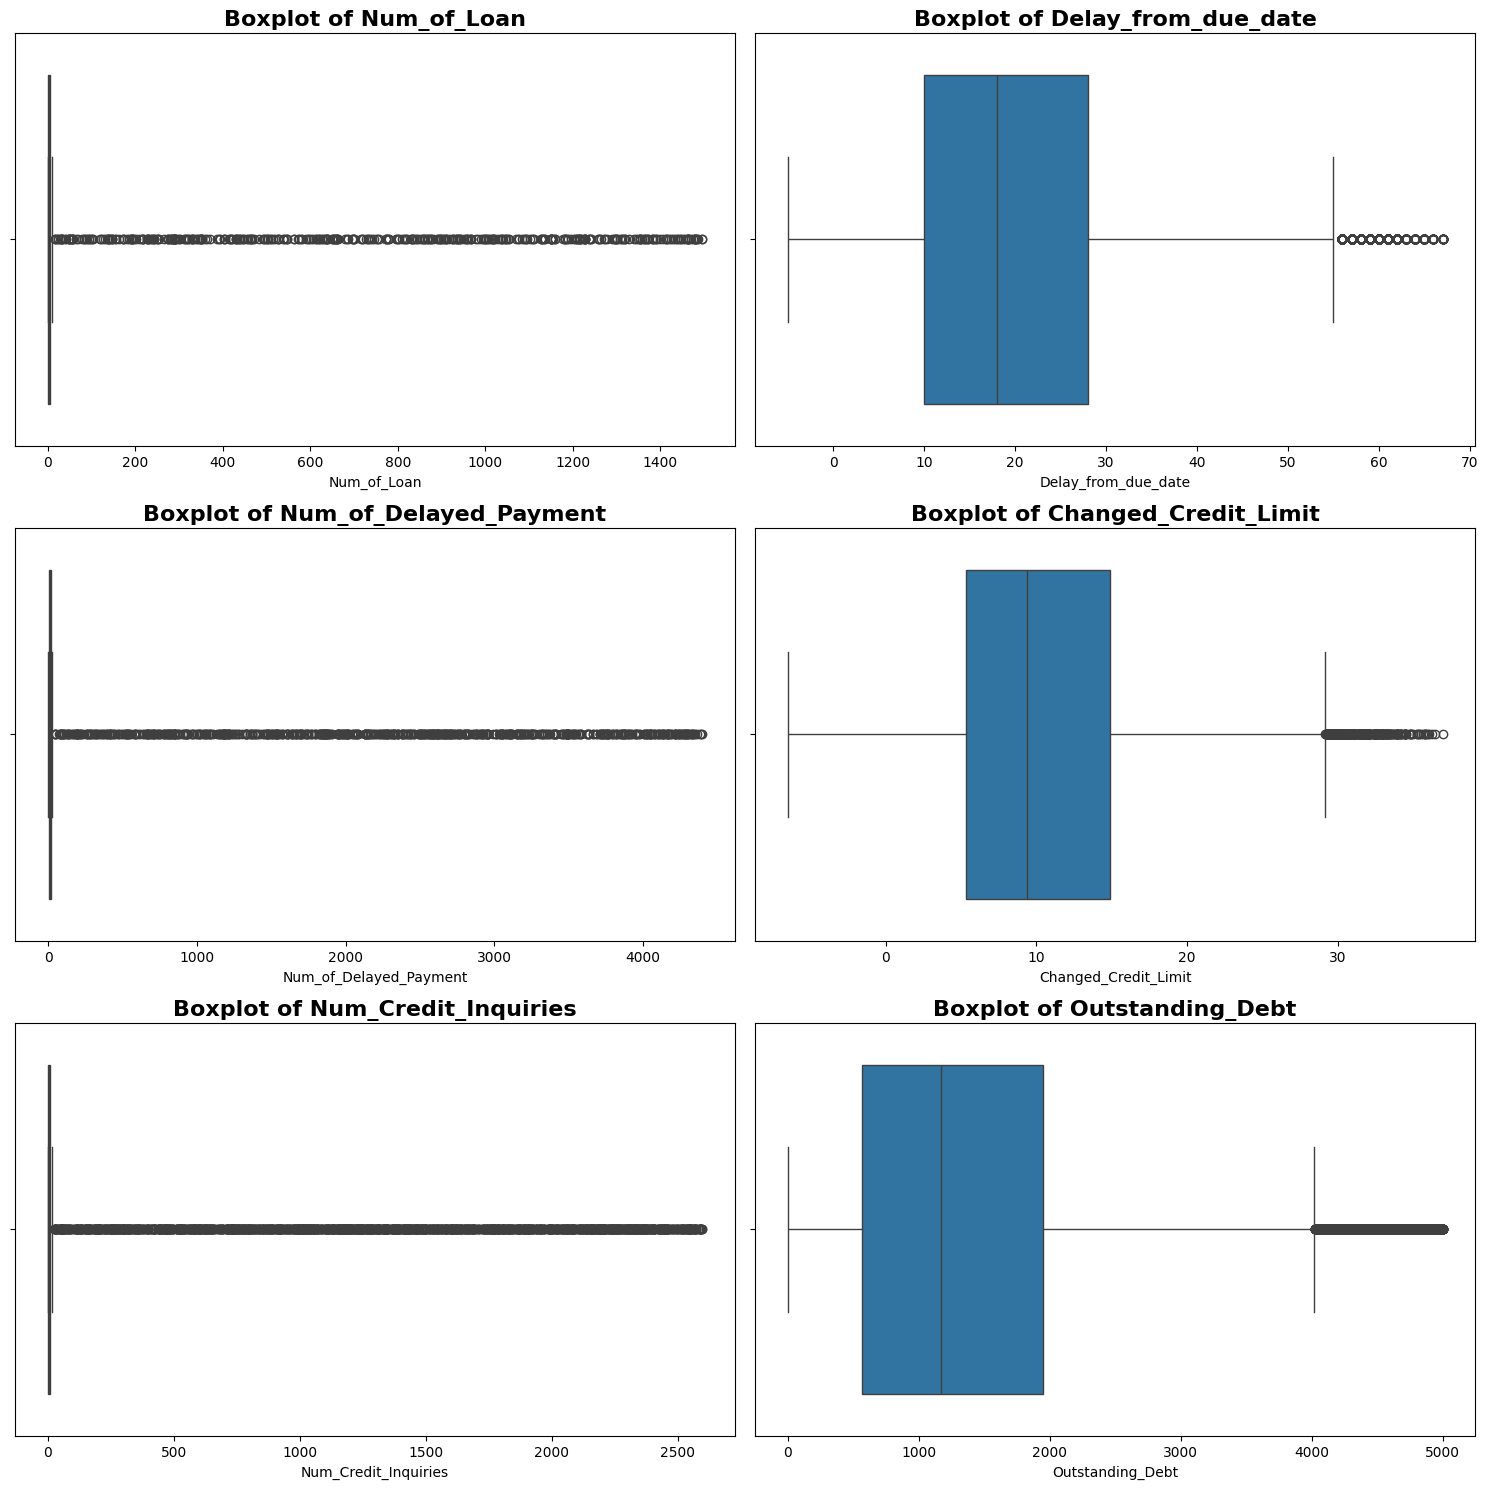

In [78]:
plt.figure(figsize=(15,15))
for i,num in enumerate(nums[6:12]):
    plt.subplot(3,2,i+1)
    sns.boxplot(data=df,x=num)
    plt.title(f"Boxplot of {num}",fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

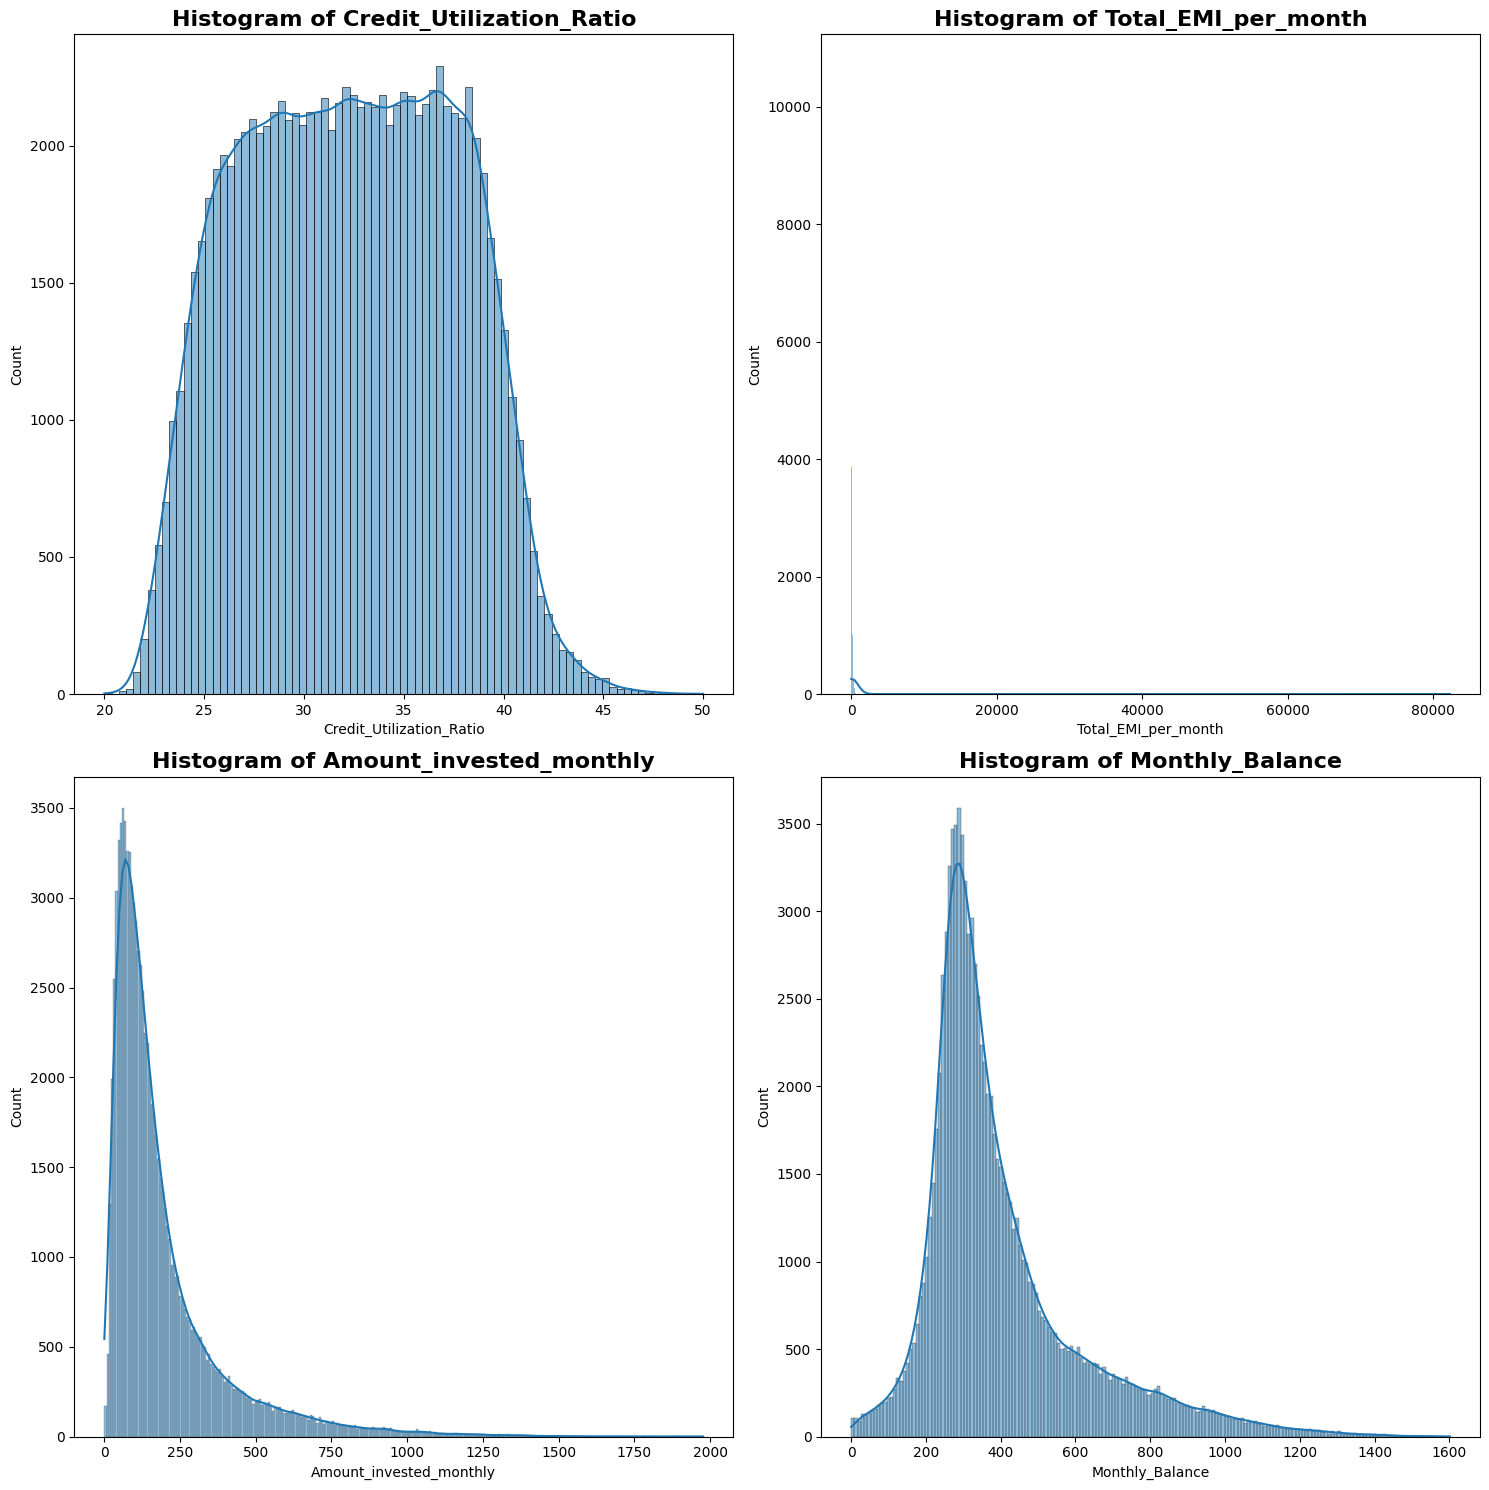

In [79]:
plt.figure(figsize=(15,15))
for i,num in enumerate(nums[12:]):
    plt.subplot(2,2,i+1)
    sns.histplot(df[num], kde=True,palette="magma")
    plt.title(f"Histogram of {num}",fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

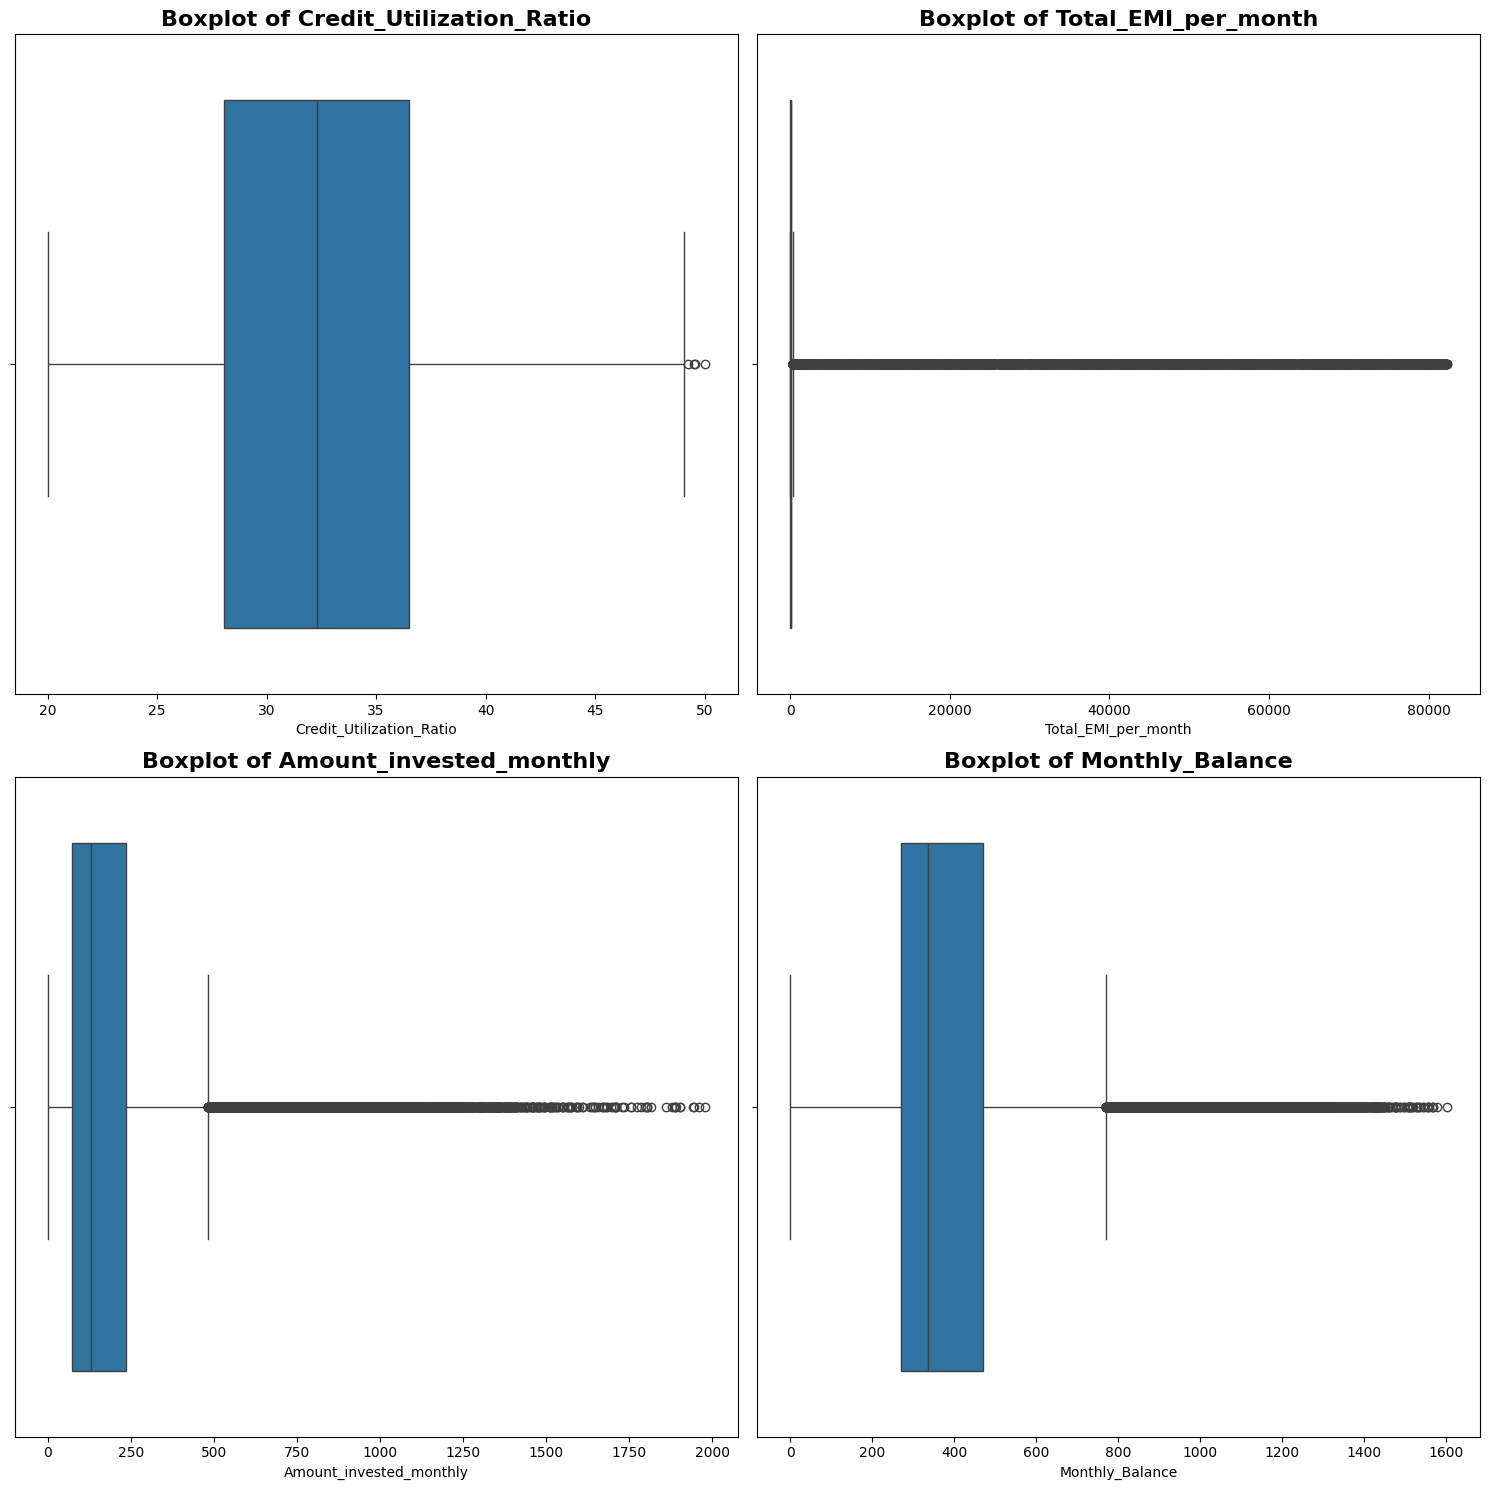

In [80]:
plt.figure(figsize=(15,15))
for i,num in enumerate(nums[12:]):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=df,x=num)
    plt.title(f"Boxplot of {num}",fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

## Correlation

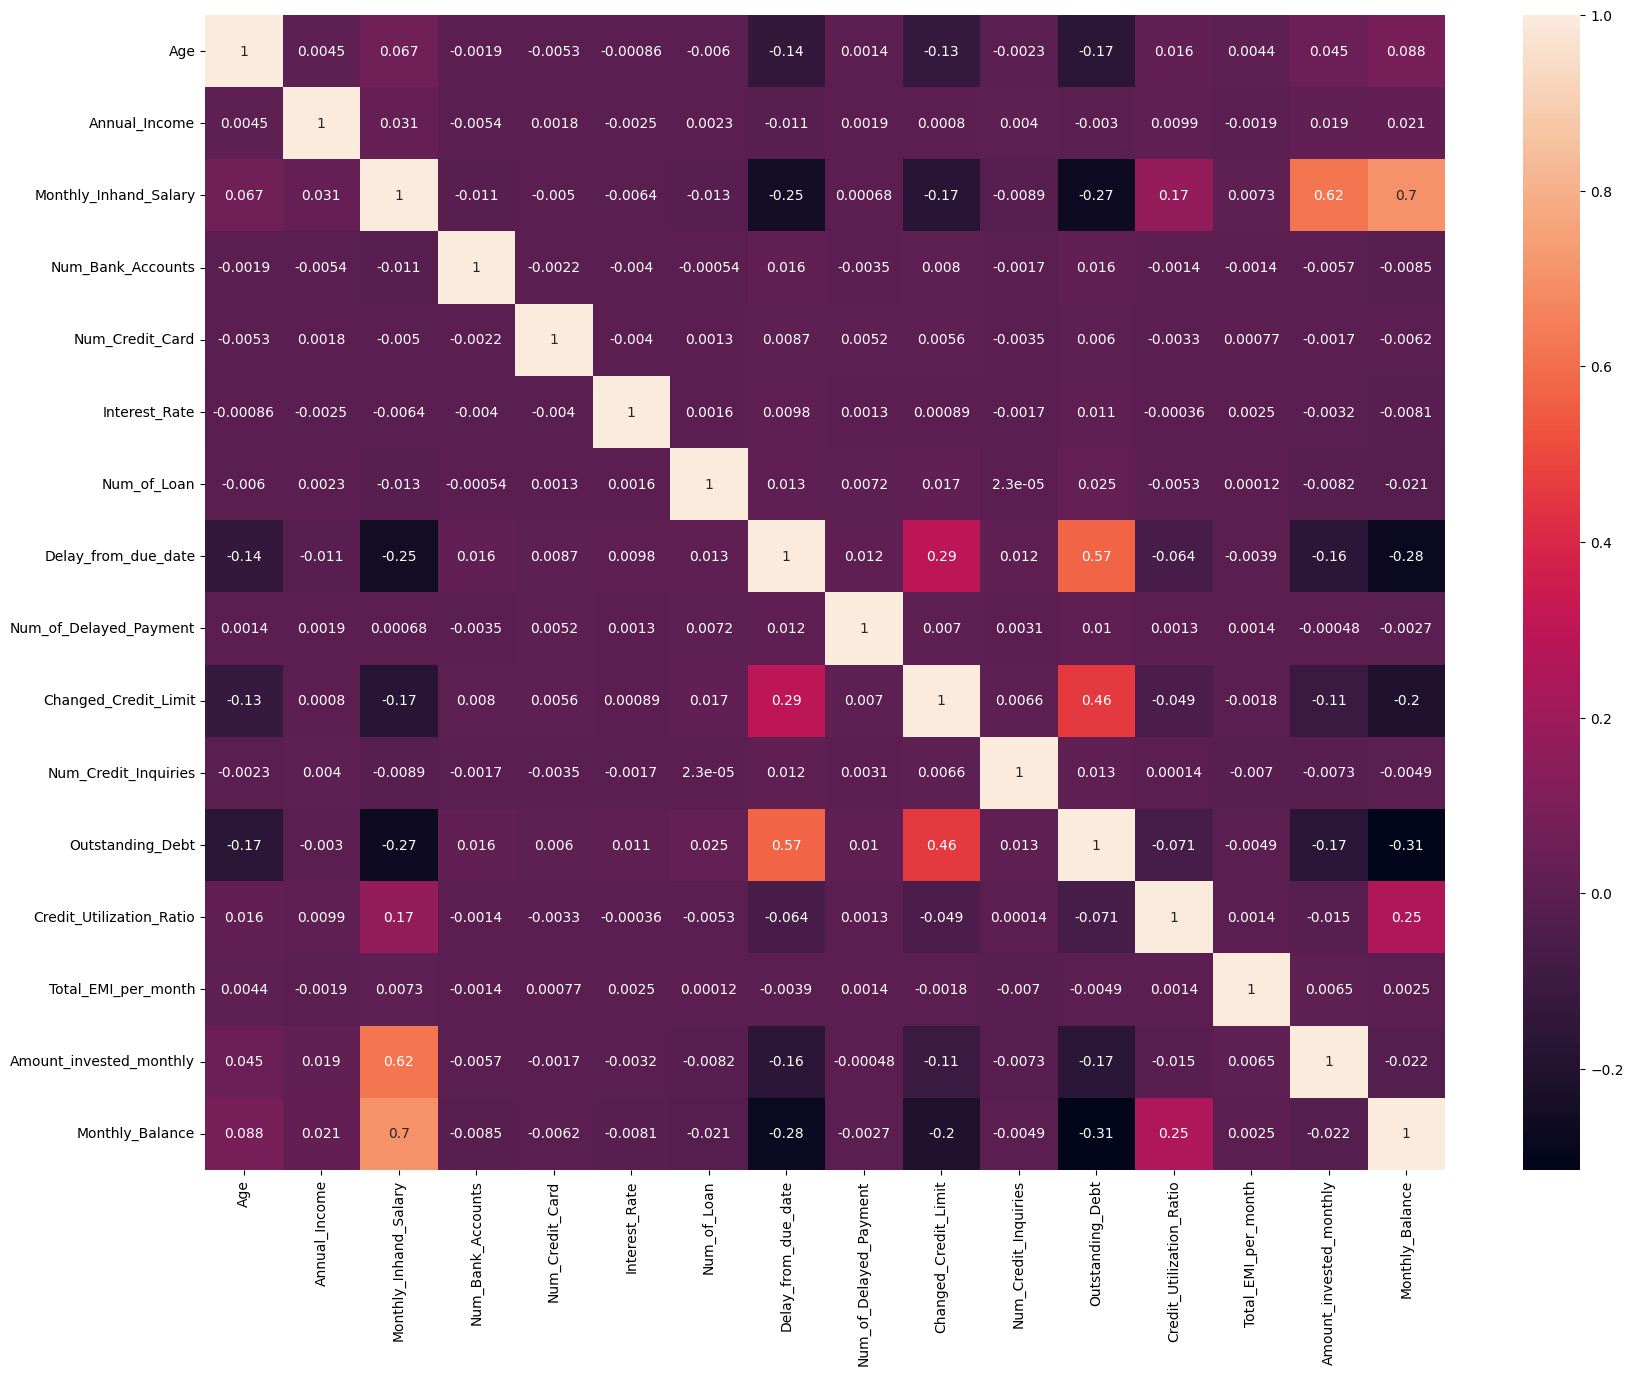

In [81]:
corr=df[nums].corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)
plt.show()

- Age:
   - Delay_from_due_Date  (-0.14)
   - Total_EMI_per_month   (-0.13)
   - Credit_Utilization_Ration  (0.17)
- Monthly_Inhand_Salary:
   -  Monthly_Balance (0.7),Amount_Invested_Monthly (0.62)

- Delay_from_due_data:
   - outstanding_debt(.57)


In [82]:
df.drop(["Num_of_Delayed_Payment",'Payment_Behaviour', 'Monthly_Balance',"Credit_History_Age"],axis=1,inplace=True)


In [83]:

df.columns,len(df.columns)

(Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
        'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
        'Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
        'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
        'Payment_of_Min_Amount', 'Total_EMI_per_month',
        'Amount_invested_monthly', 'Credit_Score'],
       dtype='object'),
 18)

In [84]:
print(df.shape)

(100000, 18)


# Train_Test Split

In [85]:
from sklearn.model_selection import train_test_split
y=df["Credit_Score"].values.reshape(-1,1)
x=df.drop("Credit_Score",axis=1)
print(x.shape)
x_train,x_val,y_train,y_val=train_test_split(
    x, y, test_size=0.15,shuffle=True,random_state=1234)


(100000, 17)


In [86]:
x_train.reset_index(drop=True,inplace=True)
x_val.reset_index(drop=True,inplace=True)



In [87]:
print(x_train.shape,x_val.shape)
print(y_train.shape,y_val.shape)

(85000, 17) (15000, 17)
(85000, 1) (15000, 1)


# Handel Outliers

In [88]:
x_train.isna().sum().sum(),x_val.isna().sum().sum()

(np.int64(69529), np.int64(12020))

In [89]:
def handel_outlier(x_train):
    numerical_cols=x_train.select_dtypes(["int","float"]).columns
    for col in numerical_cols:
        q1=x_train[col].quantile(0.25)
        q3=x_train[col].quantile(0.75)
        iqr=q3-q1
        up=q3 + 1.5*iqr
        lp=q1 - 1.5*iqr
        x_train[col]=np.clip(x_train[col],lp,up)



In [90]:
handel_outlier(x_train)
handel_outlier(x_val)
#handel_outlier(x_test)

In [91]:
x_train.isnull().sum().sum(),x_val.isnull().sum().sum()

(np.int64(69529), np.int64(12020))

In [92]:
type(x_train),type(x_val),type(y_train),type(y_val)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 numpy.ndarray,
 numpy.ndarray)

# Fill_Nulls

In [93]:
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import RobustScaler
def fill_nulls(x_train,x_val,x_test=False,n_neighbors=5):
    knnimputer=KNNImputer(n_neighbors=n_neighbors)
    catimputer = SimpleImputer(strategy='most_frequent')

    numerical_col=x_train.select_dtypes(["int","float"]).columns
    cat_col=x_train.select_dtypes(["object","category"]).columns

    x_train[numerical_col]=knnimputer.fit_transform(x_train[numerical_col])
    x_train[cat_col]=catimputer.fit_transform(x_train[cat_col])

    x_val[numerical_col]=knnimputer.transform(x_val[numerical_col])
    x_val[cat_col]=catimputer.transform(x_val[cat_col])

    if x_test:
        x_test[numerical_col]=knnimputer.transform(x_test[numerical_col])
        x_test[cat_col]=catimputer.transform(x_test[cat_col])
        return x_test


    return x_train,x_val





In [94]:

x_train,x_val=fill_nulls(x_train,x_val,x_test=False,n_neighbors=5)

In [95]:
type(x_train),type(x_val)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [96]:
# check nulls
x_train.isnull().sum().sum(),x_val.isnull().sum().sum()

(np.int64(0), np.int64(0))

# Categorical Encoding


In [97]:
cats=x_train.select_dtypes(["category","object"]).columns
cats

Index(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount'], dtype='object')

In [98]:
from sklearn.preprocessing import OrdinalEncoder
def ordinal_encoding(x_train,x_val,y_train,y_val,cats,x_test=None,y_test=None):
        oe_X = OrdinalEncoder()
        x_train[cats] = oe_X.fit_transform(x_train[cats])
        x_val[cats]=oe_X.transform(x_val[cats])

        oe_y = OrdinalEncoder()
        y_train = oe_y.fit_transform(y_train)
        y_val=oe_y.transform(y_val)

        if x_test is not None and y_test is not None:
            x_test[cats]=oe_X.transform(x_test[cats])
            y_test= oe_y.transform(y_test)
            return x_test,y_test
        return x_train,x_val,y_train,y_val



In [99]:
x_train,x_val,y_train,y_val=ordinal_encoding(x_train,x_val,y_train,y_val,cats)

In [100]:
x_train.shape,x_val.shape

((85000, 17), (15000, 17))

In [101]:
#'Occupation', 'Credit_Mix'
x_train["Payment_of_Min_Amount"].unique(),x_train["Occupation"].unique(),df["Credit_Score"].unique(),np.unique(y_train)

(array([1., 0.]),
 array([ 2.,  8.,  1., 11.,  7.,  4.,  3., 10., 14.,  6., 12.,  9.,  5.,
         0., 13.]),
 array(['Good', 'Standard', 'Poor'], dtype=object),
 array([0., 1., 2.]))

In [102]:
def scaling(x_train,x_val,scaler,x_test=None):
    x_train=scaler.fit_transform(x_train)
    x_val=scaler.transform(x_val)

    if x_test is not None:
        x_test=scaler.transform(x_test)
        return x_test
    return x_train,x_val

In [103]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
x_train,x_val=scaling(x_train,x_val,scaler)

In [104]:

# check Scaling
def check_scaling(x_train,x_val,x_test=None):
    train_medians = np.median(x_train, axis=0)
    train_iqrs = np.percentile(x_train, 75, axis=0) - np.percentile(x_train, 25, axis=0)

    val_medians = np.median(x_val, axis=0)
    val_iqrs = np.percentile(x_val, 75, axis=0) - np.percentile(x_val, 25, axis=0)
    if x_test is not None:
      test_medians = np.median(x_test, axis=0)
      test_iqrs = np.percentile(x_test, 75, axis=0) - np.percentile(x_test, 25, axis=0)
      print(f" Test median= {test_medians}")
      print(f"Test IQR     = {test_iqrs}")
    else:
      print(f" Train median= {train_medians}")
      print(f"Train IQR     = {train_iqrs}")

      print(f"val median= {val_medians}")
      print(f"val IQR     = {val_iqrs}")



In [105]:
check_scaling(x_train,x_val)

 Train median= [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -4.19406670e-16  0.00000000e+00  0.00000000e+00
  8.71037861e-17]
Train IQR     = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
val median= [ 0.          0.         -0.0009361   0.00246046  0.          0.
  0.08333333  0.          0.         -0.01283139  0.          0.
  0.00494877 -0.00544422  0.          0.00024389 -0.00981184]
val IQR     = [1.01449275 1.04166667 0.99593366 1.00429822 1.         1.
 1.         1.         1.         0.995228   1.         1.
 1.00976663 0.98142177 1.         0.99118279 0.98384671]


# Baseline_Model

In [106]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
svm = SVC(kernel='rbf',C=1.0,gamma='scale',random_state=42,verbose=True)
svm.fit(x_train,y_train)

[LibSVM]

SVC(random_state=42, verbose=True)

In [107]:
y_val_pred=svm.predict(x_val)

In [108]:
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

         0.0       0.56      0.61      0.58      2747
         1.0       0.73      0.61      0.67      4307
         2.0       0.72      0.76      0.74      7946

    accuracy                           0.69     15000
   macro avg       0.67      0.66      0.66     15000
weighted avg       0.69      0.69      0.69     15000



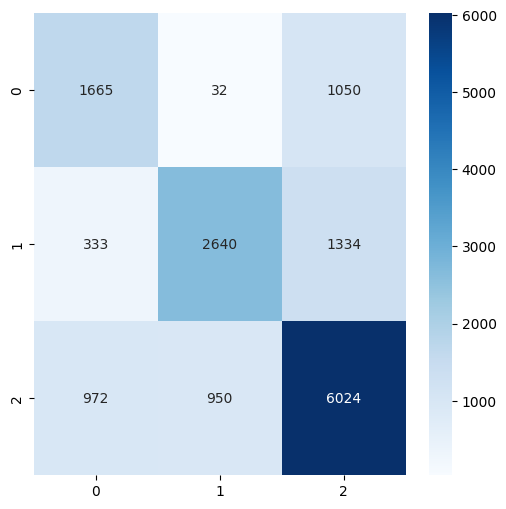

In [109]:
cm=confusion_matrix(y_val,y_val_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.show()

# Hyperparameters_Tunning

In [110]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold

model = SVC( kernel="rbf",random_state=42)
param={
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1],

}

cv=StratifiedKFold(n_splits=3,shuffle=True, random_state=42)

search=GridSearchCV(model,param,cv=cv,scoring="accuracy",n_jobs=-1,verbose=2)

In [111]:
search.fit(x_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1]},
             scoring='accuracy', verbose=2)

In [112]:
search.best_params_,search.best_score_

({'C': 10, 'gamma': 0.1}, np.float64(0.7010000091904801))

In [113]:
y_val_pred = search.best_estimator_.predict(x_val)

In [114]:
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

         0.0       0.58      0.62      0.60      2747
         1.0       0.73      0.65      0.69      4307
         2.0       0.73      0.76      0.74      7946

    accuracy                           0.70     15000
   macro avg       0.68      0.67      0.68     15000
weighted avg       0.70      0.70      0.70     15000



# Evalute On Test_Dataset

In [115]:
# final_model = search.best_estimator_
# y_test_pred = final_model.predict(x_test)

# print(classification_report(y_test, y_test_pred))

# Random_Forest

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    n_jobs=-1,
    random_state=42
)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=20, n_estimators=300, n_jobs=-1,
                       random_state=42)

In [117]:
y_val_pred=rf.predict(x_val)

In [118]:
print( classification_report(y_val, y_val_pred))


              precision    recall  f1-score   support

         0.0       0.71      0.69      0.70      2747
         1.0       0.77      0.79      0.78      4307
         2.0       0.80      0.79      0.79      7946

    accuracy                           0.77     15000
   macro avg       0.76      0.76      0.76     15000
weighted avg       0.77      0.77      0.77     15000



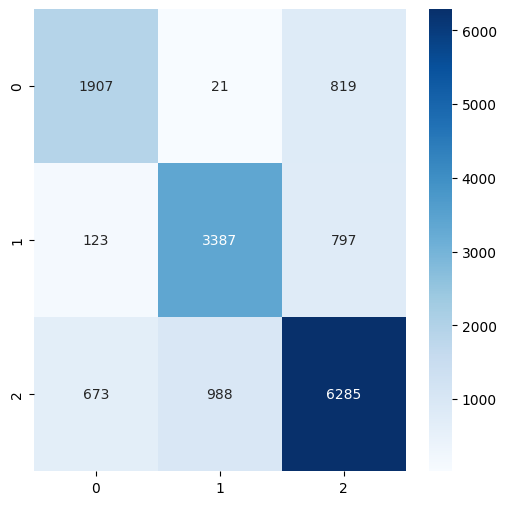

In [119]:
cm=confusion_matrix(y_val,y_val_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.show()

In [125]:
class_weights = {
    0.0: 1.8,
    1.0: 1.2,
    2.0: 0.8
}

rf = RandomForestClassifier(class_weight=class_weights,n_estimators=300,
                    random_state=42,n_jobs=-1
                           )
rf.fit(x_train,y_train)

RandomForestClassifier(class_weight={0.0: 1.8, 1.0: 1.2, 2.0: 0.8},
                       n_estimators=300, n_jobs=-1, random_state=42)

In [126]:
y_val_pred=rf.predict(x_val)

In [127]:
print( classification_report(y_val, y_val_pred))


              precision    recall  f1-score   support

         0.0       0.75      0.69      0.72      2747
         1.0       0.77      0.80      0.79      4307
         2.0       0.80      0.80      0.80      7946

    accuracy                           0.78     15000
   macro avg       0.77      0.77      0.77     15000
weighted avg       0.78      0.78      0.78     15000



# ANN

In [128]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader
import  torch.optim as optim

In [129]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

{np.float64(0.0): np.int64(15081), np.float64(1.0): np.int64(24691), np.float64(2.0): np.int64(45228)}


In [130]:
weights = 1.0 / counts


In [131]:
print(np.var(x_train, axis=0))


[0.42502596 0.48048865 0.51915205 0.51013298 0.46217812 0.55273874
 0.59619565 0.66296515 0.6421214  0.50970877 0.47163888 0.61485258
 0.62086429 0.36566133 0.22942632 0.63634505 0.67313172]


In [132]:
class neural_nets(nn.Module):
    def __init__(self,input_dim):
        super(neural_nets,self).__init__()
        self.model=nn.Sequential(
            nn.Linear(input_dim,128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128,64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64,32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32,3)
            )
    def forward(self,x):
            return self.model(x)



In [133]:
class custom_Dataset(Dataset):
    def __init__(self,x,y):
        self.x=torch.FloatTensor(x)
        self.y=torch.LongTensor(y).squeeze()

    def __len__(self):
        return len(self.y)
    def __getitem__(self,idx):
        return self.x[idx],self.y[idx]



In [134]:
train_dataset=custom_Dataset(x_train,y_train)
val_dataset=custom_Dataset(x_val,y_val)
#test_dataset=custom_Dataset(x_test,y_test)
train_dataset_loader=DataLoader(train_dataset,batch_size=32,shuffle=True,num_workers=4)
val_dataset_laoder=DataLoader(val_dataset,batch_size=32,shuffle=False,num_workers=0)
#test_dataset_loader=DataLoader(test_dataset,batch_size=32,shuffle=False,num_workers=0)

In [135]:
cuda=torch.cuda.is_available()
device=torch.device("cuda" if cuda else "cpu")
device

device(type='cuda')

In [136]:
input_dim=x_train.shape[1]
model=neural_nets(input_dim)
model.to(device)

neural_nets(
  (model): Sequential(
    (0): Linear(in_features=17, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=32, bias=True)
    (9): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.3, inplace=False)
    (12): Linear(in_features=32, out_features=3, bias=True)
  )
)

In [137]:
!pip install torchsummary
from torchsummary import summary
summary(model, input_size=(input_dim,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]           2,304
       BatchNorm1d-2                  [-1, 128]             256
              ReLU-3                  [-1, 128]               0
           Dropout-4                  [-1, 128]               0
            Linear-5                   [-1, 64]           8,256
       BatchNorm1d-6                   [-1, 64]             128
              ReLU-7                   [-1, 64]               0
           Dropout-8                   [-1, 64]               0
            Linear-9                   [-1, 32]           2,080
      BatchNorm1d-10                   [-1, 32]              64
             ReLU-11                   [-1, 32]               0
          Dropout-12                   [-1, 32]               0
           Linear-13                    [-1, 3]              99
Total params: 13,187
Trainable params: 

In [138]:
optimizer=optim.AdamW(model.parameters(),lr=0.001,weight_decay=1e-4)
critrion=nn.CrossEntropyLoss(weight=torch.FloatTensor(weights).to(device))

In [139]:
def evaluate(model, loader, criterion):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for x_batch, y_batch in loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            outputs = model(x_batch)
            loss = criterion(outputs, y_batch)

            total_loss += loss.item() * x_batch.size(0)  # lenght of batch
            predicted = outputs.argmax(dim=1)
            correct += (predicted == y_batch).sum().item()
            total += y_batch.size(0)

    return total_loss / total, correct / total

In [142]:
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=100):
    history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}

    for epoch in range(epochs):
        # Training
        model.train()
        epoch_loss = 0
        correct = 0
        total = 0

        for x_batch, y_batch in train_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)

            # Forward pass
            outputs = model(x_batch)
            loss = criterion(outputs, y_batch)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Track metrics
            epoch_loss += loss.item() * x_batch.size(0)
            predicted = outputs.argmax(dim=1)
            correct += (predicted == y_batch).sum().item()
            total += y_batch.size(0)

        # Validation
        val_loss, val_acc = evaluate(model, val_loader, criterion)

        # Store history
        history['train_loss'].append(epoch_loss / total)
        history['train_acc'].append(correct / total)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)

        # Print epoch summary
        print(f'Epoch {epoch+1}/{epochs} | '
              f'Train Loss: {history["train_loss"][-1]:.4f} | '
              f'Train Acc: {history["train_acc"][-1]:.4f} | '
              f'Val Loss: {val_loss:.4f} | '
              f'Val Acc: {val_acc:.4f}')

    return history



In [143]:
history = train_model(
    model=model,
    train_loader=train_dataset_loader,
    val_loader=val_dataset_laoder,
    criterion=critrion,
    optimizer=optimizer,
    epochs=50
)

Epoch 1/50 | Train Loss: 0.8023 | Train Acc: 0.6168 | Val Loss: 0.7347 | Val Acc: 0.6581
Epoch 2/50 | Train Loss: 0.7696 | Train Acc: 0.6363 | Val Loss: 0.7253 | Val Acc: 0.6517
Epoch 3/50 | Train Loss: 0.7652 | Train Acc: 0.6407 | Val Loss: 0.7200 | Val Acc: 0.6619
Epoch 4/50 | Train Loss: 0.7611 | Train Acc: 0.6418 | Val Loss: 0.7194 | Val Acc: 0.6598
Epoch 5/50 | Train Loss: 0.7584 | Train Acc: 0.6426 | Val Loss: 0.7204 | Val Acc: 0.6493
Epoch 6/50 | Train Loss: 0.7545 | Train Acc: 0.6463 | Val Loss: 0.7174 | Val Acc: 0.6553
Epoch 7/50 | Train Loss: 0.7520 | Train Acc: 0.6454 | Val Loss: 0.7156 | Val Acc: 0.6602
Epoch 8/50 | Train Loss: 0.7512 | Train Acc: 0.6457 | Val Loss: 0.7152 | Val Acc: 0.6555
Epoch 9/50 | Train Loss: 0.7499 | Train Acc: 0.6466 | Val Loss: 0.7139 | Val Acc: 0.6661
Epoch 10/50 | Train Loss: 0.7499 | Train Acc: 0.6455 | Val Loss: 0.7193 | Val Acc: 0.6536
Epoch 11/50 | Train Loss: 0.7466 | Train Acc: 0.6464 | Val Loss: 0.7117 | Val Acc: 0.6641
Epoch 12/50 | Train

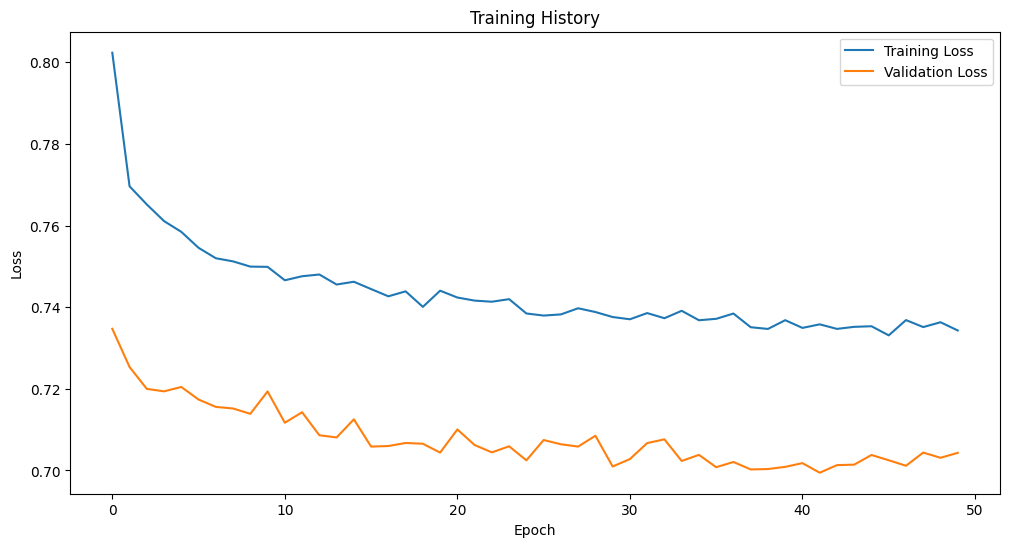

In [144]:
plt.figure(figsize=(12, 6))
plt.plot(history['train_loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

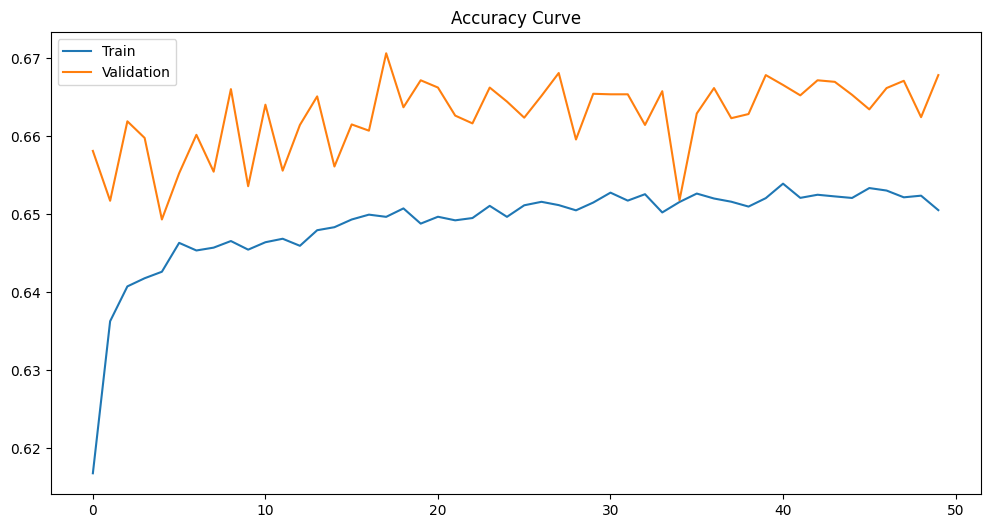

In [145]:
plt.figure(figsize=(12, 6))

plt.plot(history['train_acc'], label='Train')
plt.plot(history['val_acc'], label='Validation')
plt.title('Accuracy Curve')
plt.legend()
plt.show()